<a href="https://colab.research.google.com/github/Lambru99/Fashion_MNIST_CNN/blob/main/Definitivo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, UpSampling2D
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape le immagini in modo da avere una dimensione aggiuntiva per il canale di colore (in questo caso 1, scala di grigi)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converti le etichette in formato one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [3]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)

CNN

In [4]:
model = tf.keras.Sequential()

# Convolutional layers
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1), name='conv1'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool1'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout1'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='conv2'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool2'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout2'))

# Flatten and dense layers
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(256, activation='relu', name='dense1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout3'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense2'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 64)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 dropout1 (Dropout)          (None, 14, 14, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        8224      
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                                 
 dropout2 (Dropout)          (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
cnn_results = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 20s 8ms/step - loss: 0.5908 - accuracy: 0.7830 - val_loss: 0.3822 - val_accuracy: 0.8673
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4118 - accuracy: 0.8485 - val_loss: 0.3265 - val_accuracy: 0.8833
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3693 - accuracy: 0.8641 - val_loss: 0.2985 - val_accuracy: 0.8905
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3367 - accuracy: 0.8762 - val_loss: 0.2750 - val_accuracy: 0.8994
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3188 - accuracy: 0.8824 - val_loss: 0.2704 - val_accuracy: 0.8982
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3063 - accuracy: 0.8885 - val_loss: 0.2580 - val_accuracy: 0.9050
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2935 - accuracy: 0.8921 - val_loss: 0.2566 - val_accur

In [8]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8967000246047974


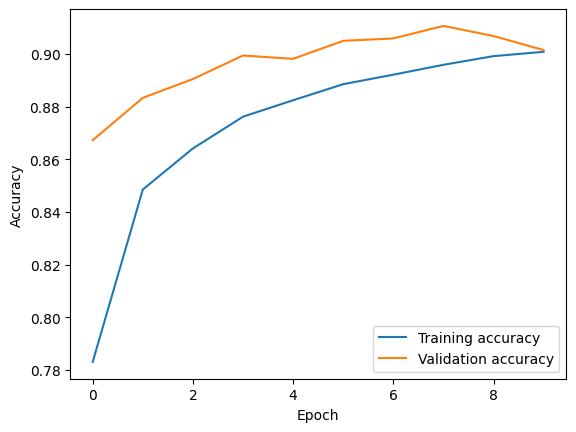

In [9]:
# Get training and validation accuracy
train_acc = cnn_results.history['accuracy']
val_acc = cnn_results.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


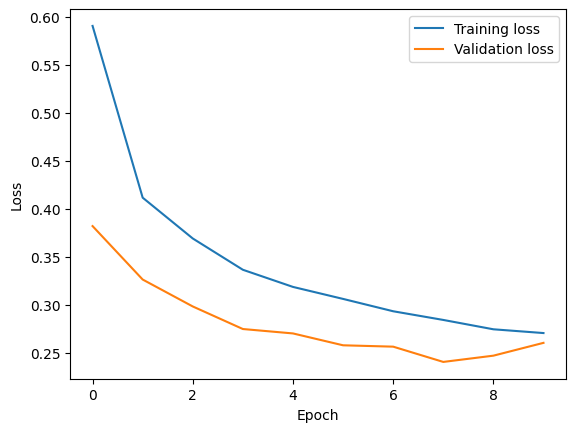

In [10]:
# Get training and validation loss
train_loss = cnn_results.history['loss']
val_loss = cnn_results.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## confusion matrix

313/313 [==============================] - 1s 2ms/step


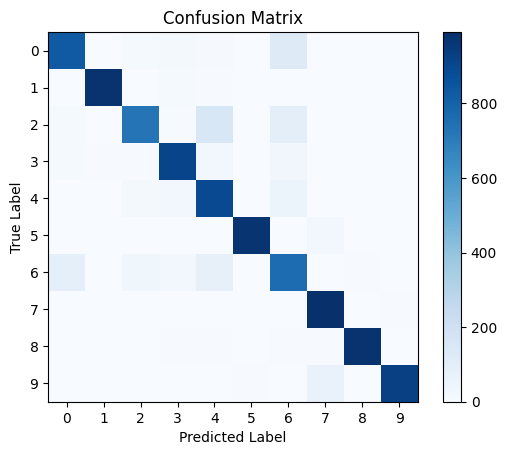

[[832   0  12  20   8   1 123   1   3   0]
 [  0 979   0  13   4   0   2   0   2   0]
 [ 12   1 728   7 153   0  99   0   0   0]
 [ 14   7   7 910  29   0  32   0   1   0]
 [  1   0  19  27 893   0  60   0   0   0]
 [  0   0   0   0   0 971   0  26   0   3]
 [ 90   1  35  27  80   0 760   0   7   0]
 [  0   0   0   0   0   3   0 991   0   6]
 [  0   1   0   5   6   2   5   5 976   0]
 [  0   0   0   0   0   4   1  68   0 927]]


In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(confusion_mtx)


##Linear readout

In [12]:
from tensorflow.keras.models import Model

def get_hidden_representation(layer_name):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(x_train)
    return intermediate_output

In [13]:
#conv1_output = get_hidden_representation("conv1")
conv2_output = get_hidden_representation("conv2")
dense_output = get_hidden_representation("dense1")

1875/1875 [==============================] - 4s 2ms/step


In [14]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(14, 14, 32)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = linear_model.fit(conv2_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.4507 - accuracy: 0.8643 - val_loss: 0.3140 - val_accuracy: 0.8932
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2757 - accuracy: 0.9062 - val_loss: 0.2762 - val_accuracy: 0.9048
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2405 - accuracy: 0.9170 - val_loss: 0.2593 - val_accuracy: 0.9088
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2193 - accuracy: 0.9250 - val_loss: 0.2502 - val_accuracy: 0.9110
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2034 - accuracy: 0.9294 - val_loss: 0.2435 - val_accuracy: 0.9120
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1909 - accuracy: 0.9348 - val_loss: 0.2402 - val_accuracy: 0.9137
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1808 - accuracy: 0.9384 - val_loss: 0.2388 - val_accuracy: 0.9142
Epoch 

In [16]:
# valuta il modello sul set di test
score_conv2 = linear_model.evaluate(conv2_output, y_train, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_conv2[1])


 Test accuracy of the linear model with conv2 input: 0.9434499740600586


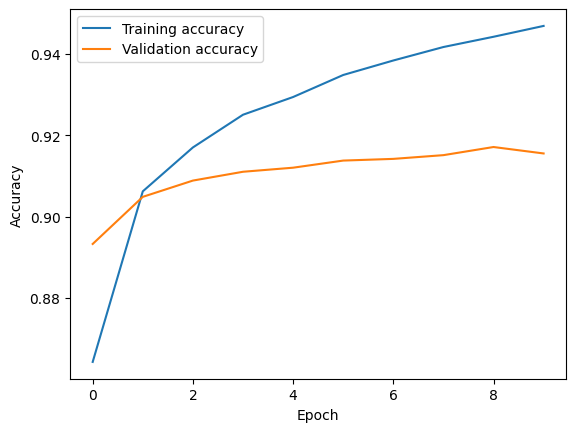

In [17]:
# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


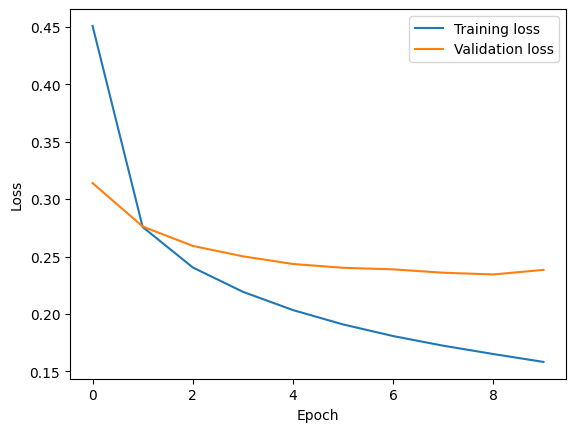

In [18]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
linear_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
hystory2=linear_model2.fit(dense_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3551 - accuracy: 0.8900 - val_loss: 0.2493 - val_accuracy: 0.9098
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1969 - accuracy: 0.9288 - val_loss: 0.2374 - val_accuracy: 0.9114
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1835 - accuracy: 0.9325 - val_loss: 0.2328 - val_accuracy: 0.9114
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1766 - accuracy: 0.9337 - val_loss: 0.2314 - val_accuracy: 0.9116
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1720 - accuracy: 0.9362 - val_loss: 0.2306 - val_accuracy: 0.9127
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1690 - accuracy: 0.9362 - val_loss: 0.2303 - val_accuracy: 0.9137
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1663 - accuracy: 0.9375 - val_loss: 0.2310 - val_accuracy: 0.9137
Epoch 

In [21]:
# valuta il modello sul set di test
score_dense = linear_model2.evaluate(dense_output, y_train, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_dense[1])


 Test accuracy of the linear model with conv2 input: 0.9349666833877563


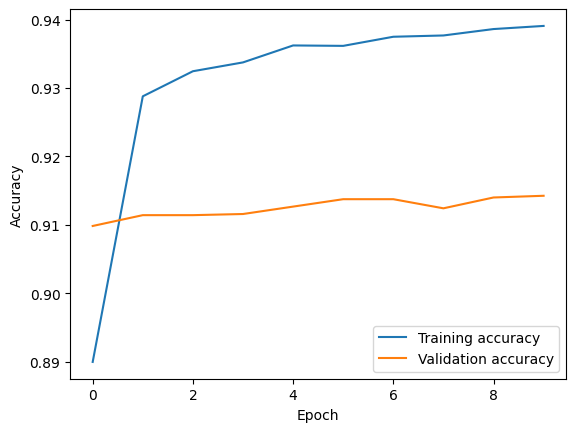

In [22]:
# Get training and validation accuracy
train_acc2 = hystory2.history['accuracy']
val_acc2 = hystory2.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc2, label='Training accuracy')
plt.plot(val_acc2, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()

## Feature Visualization Method

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


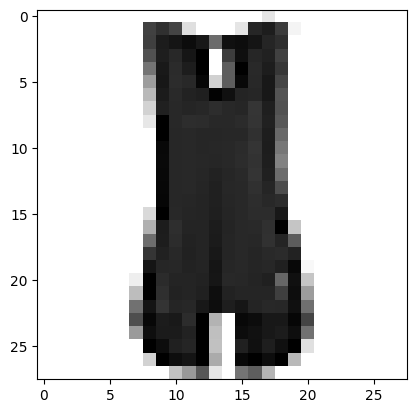

LABEL: T-shirt/top
conv1 (1, 28, 28, 64) 


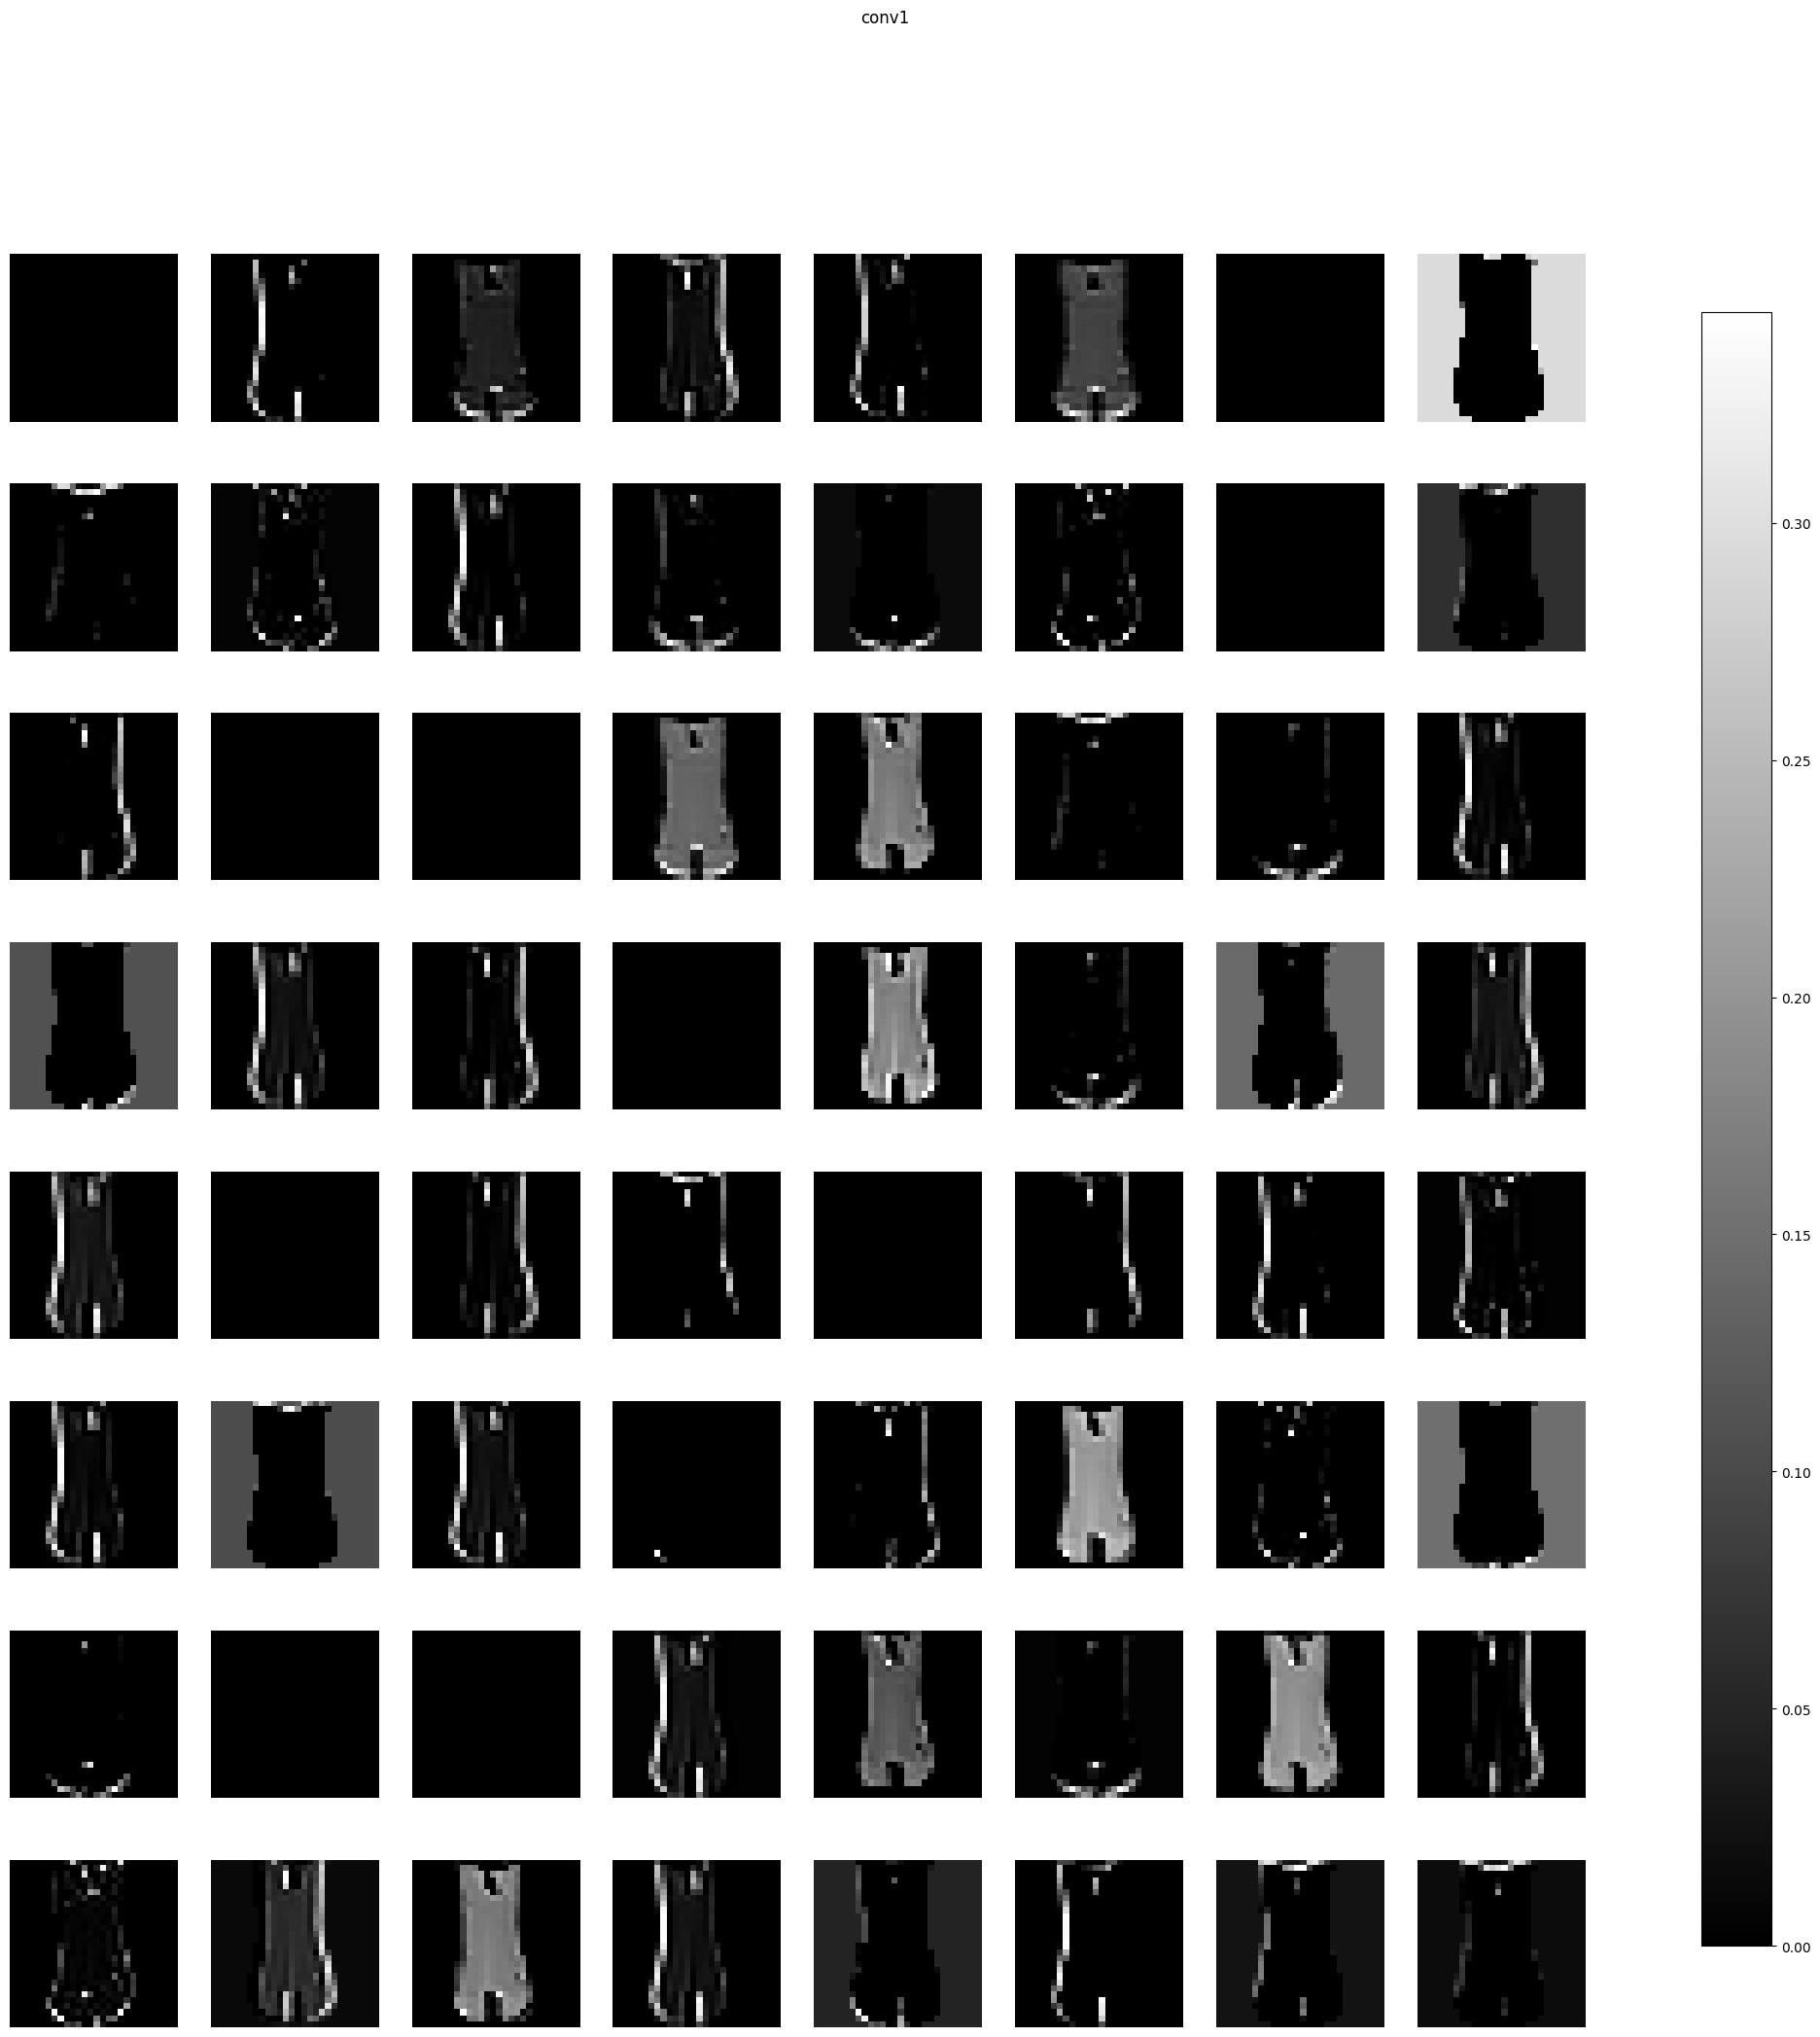

conv2 (1, 14, 14, 32) 


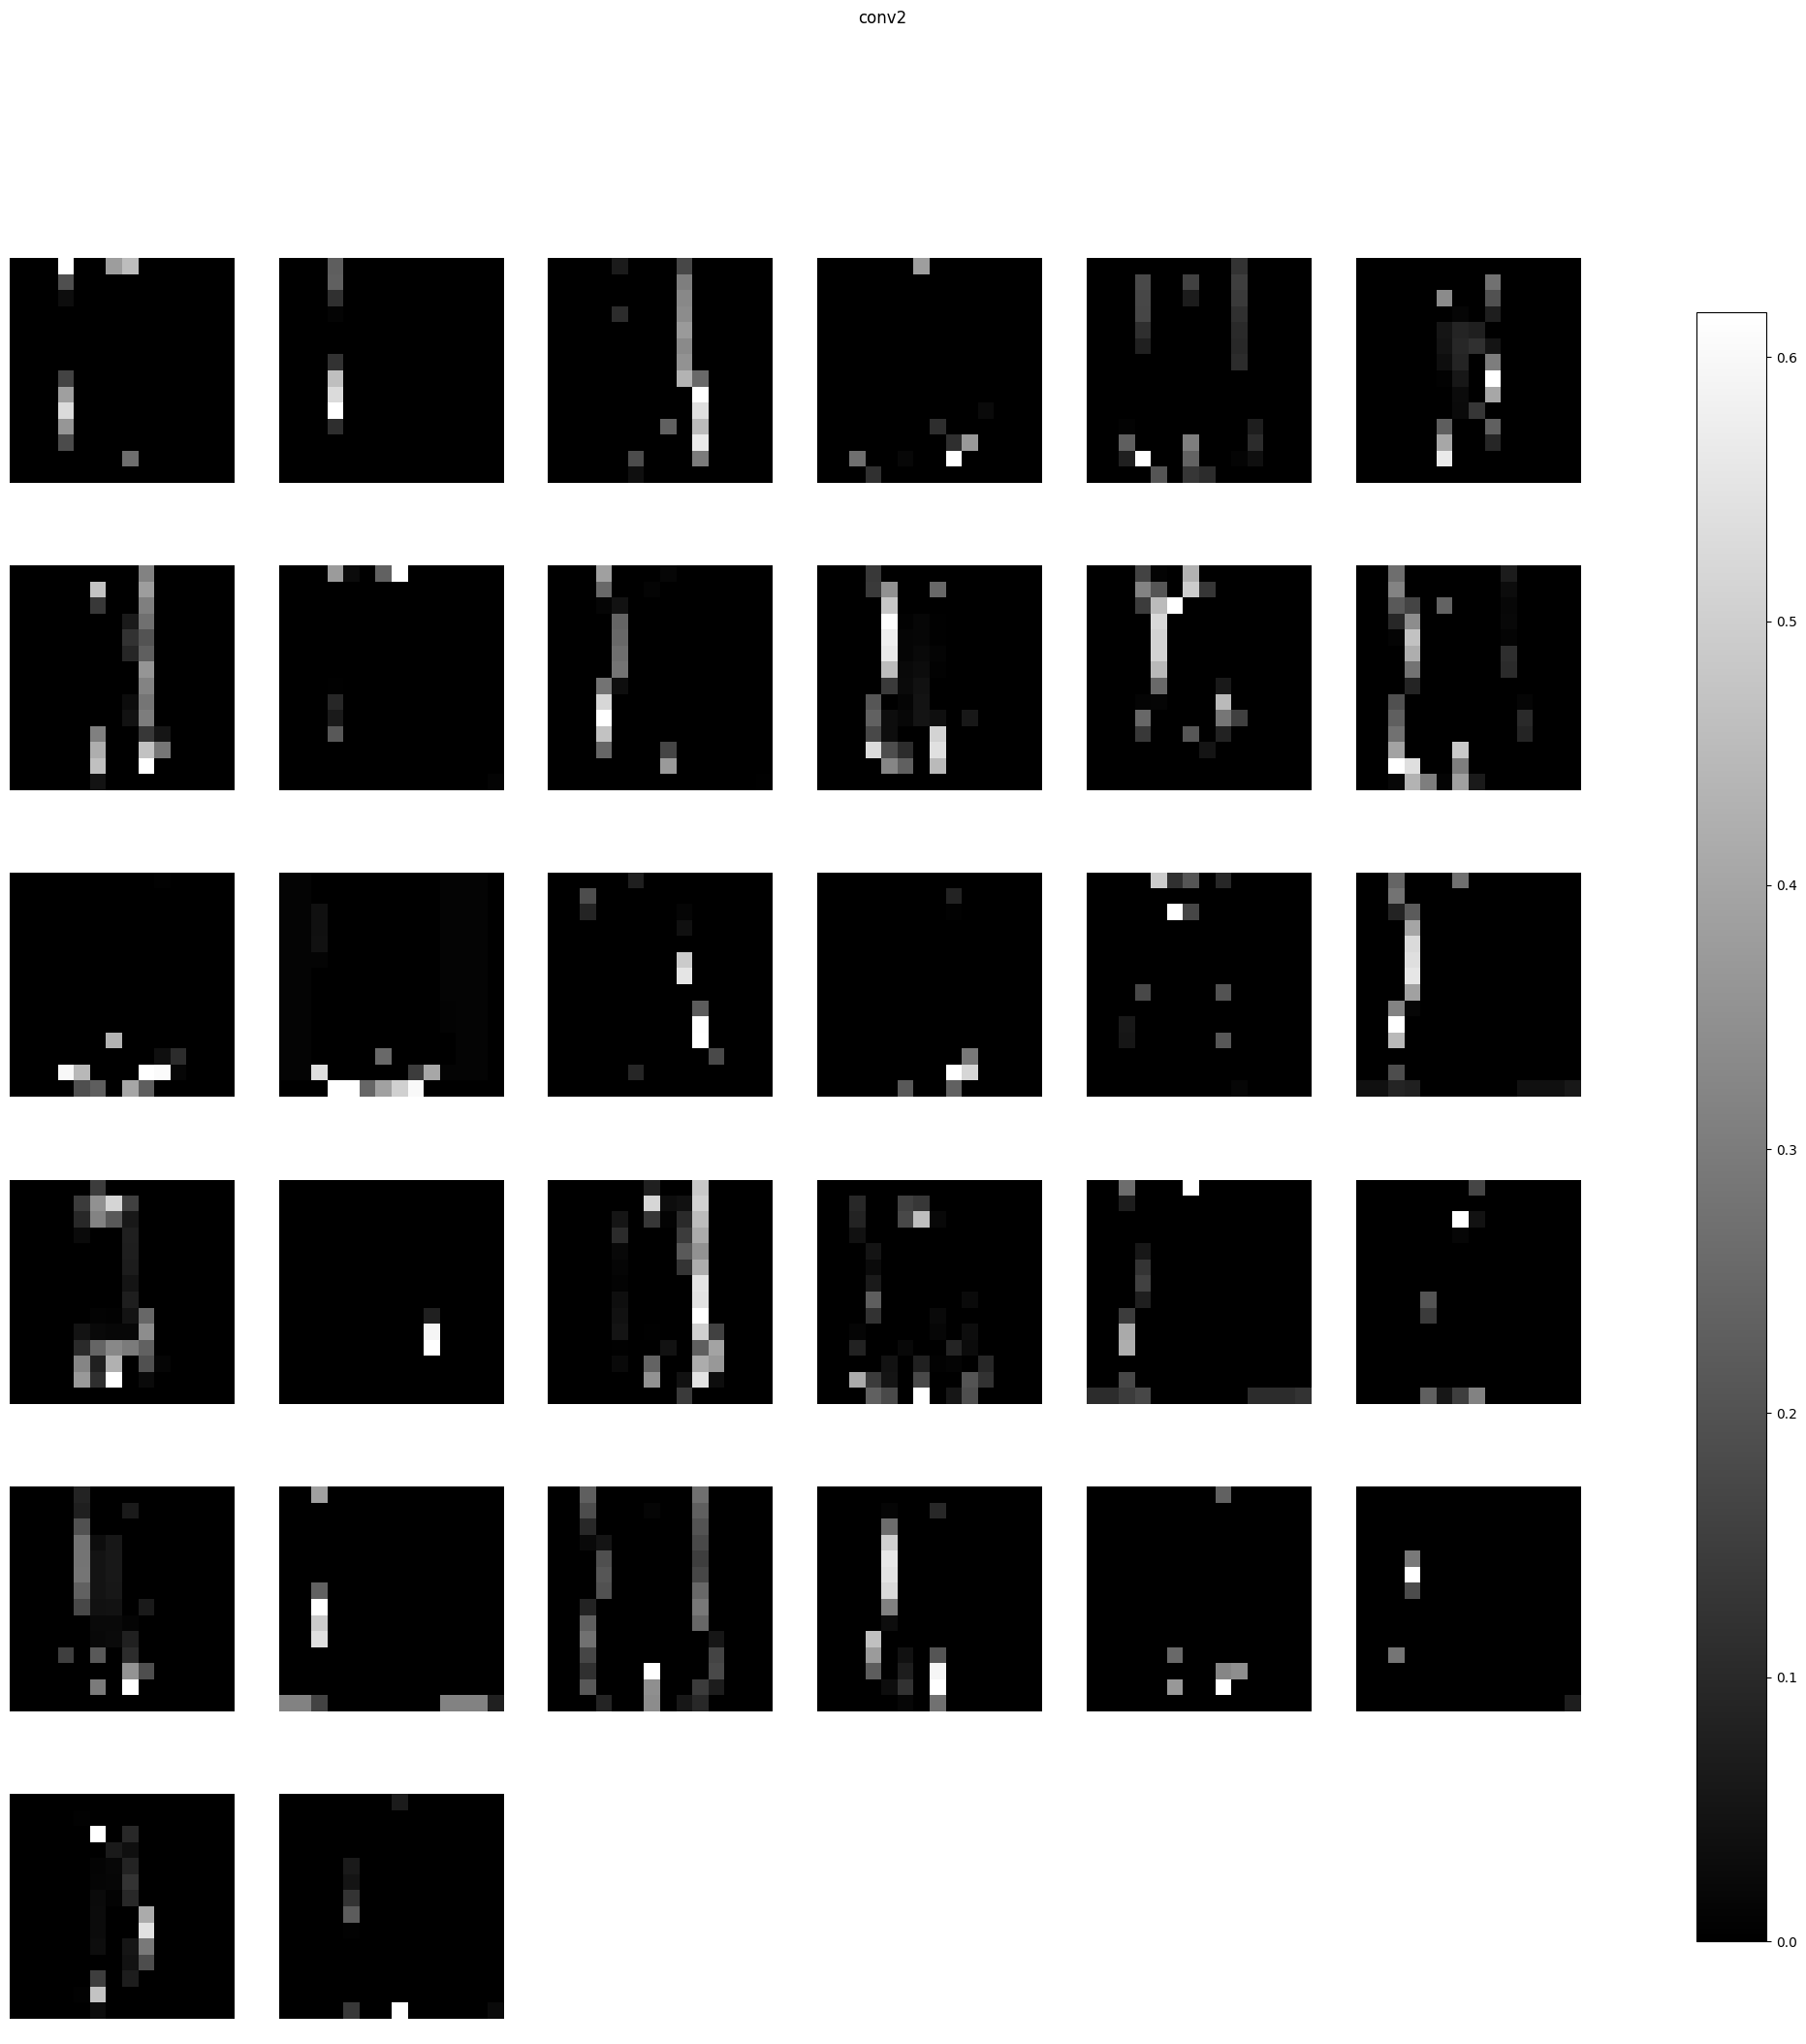

dense1 (1, 256) 


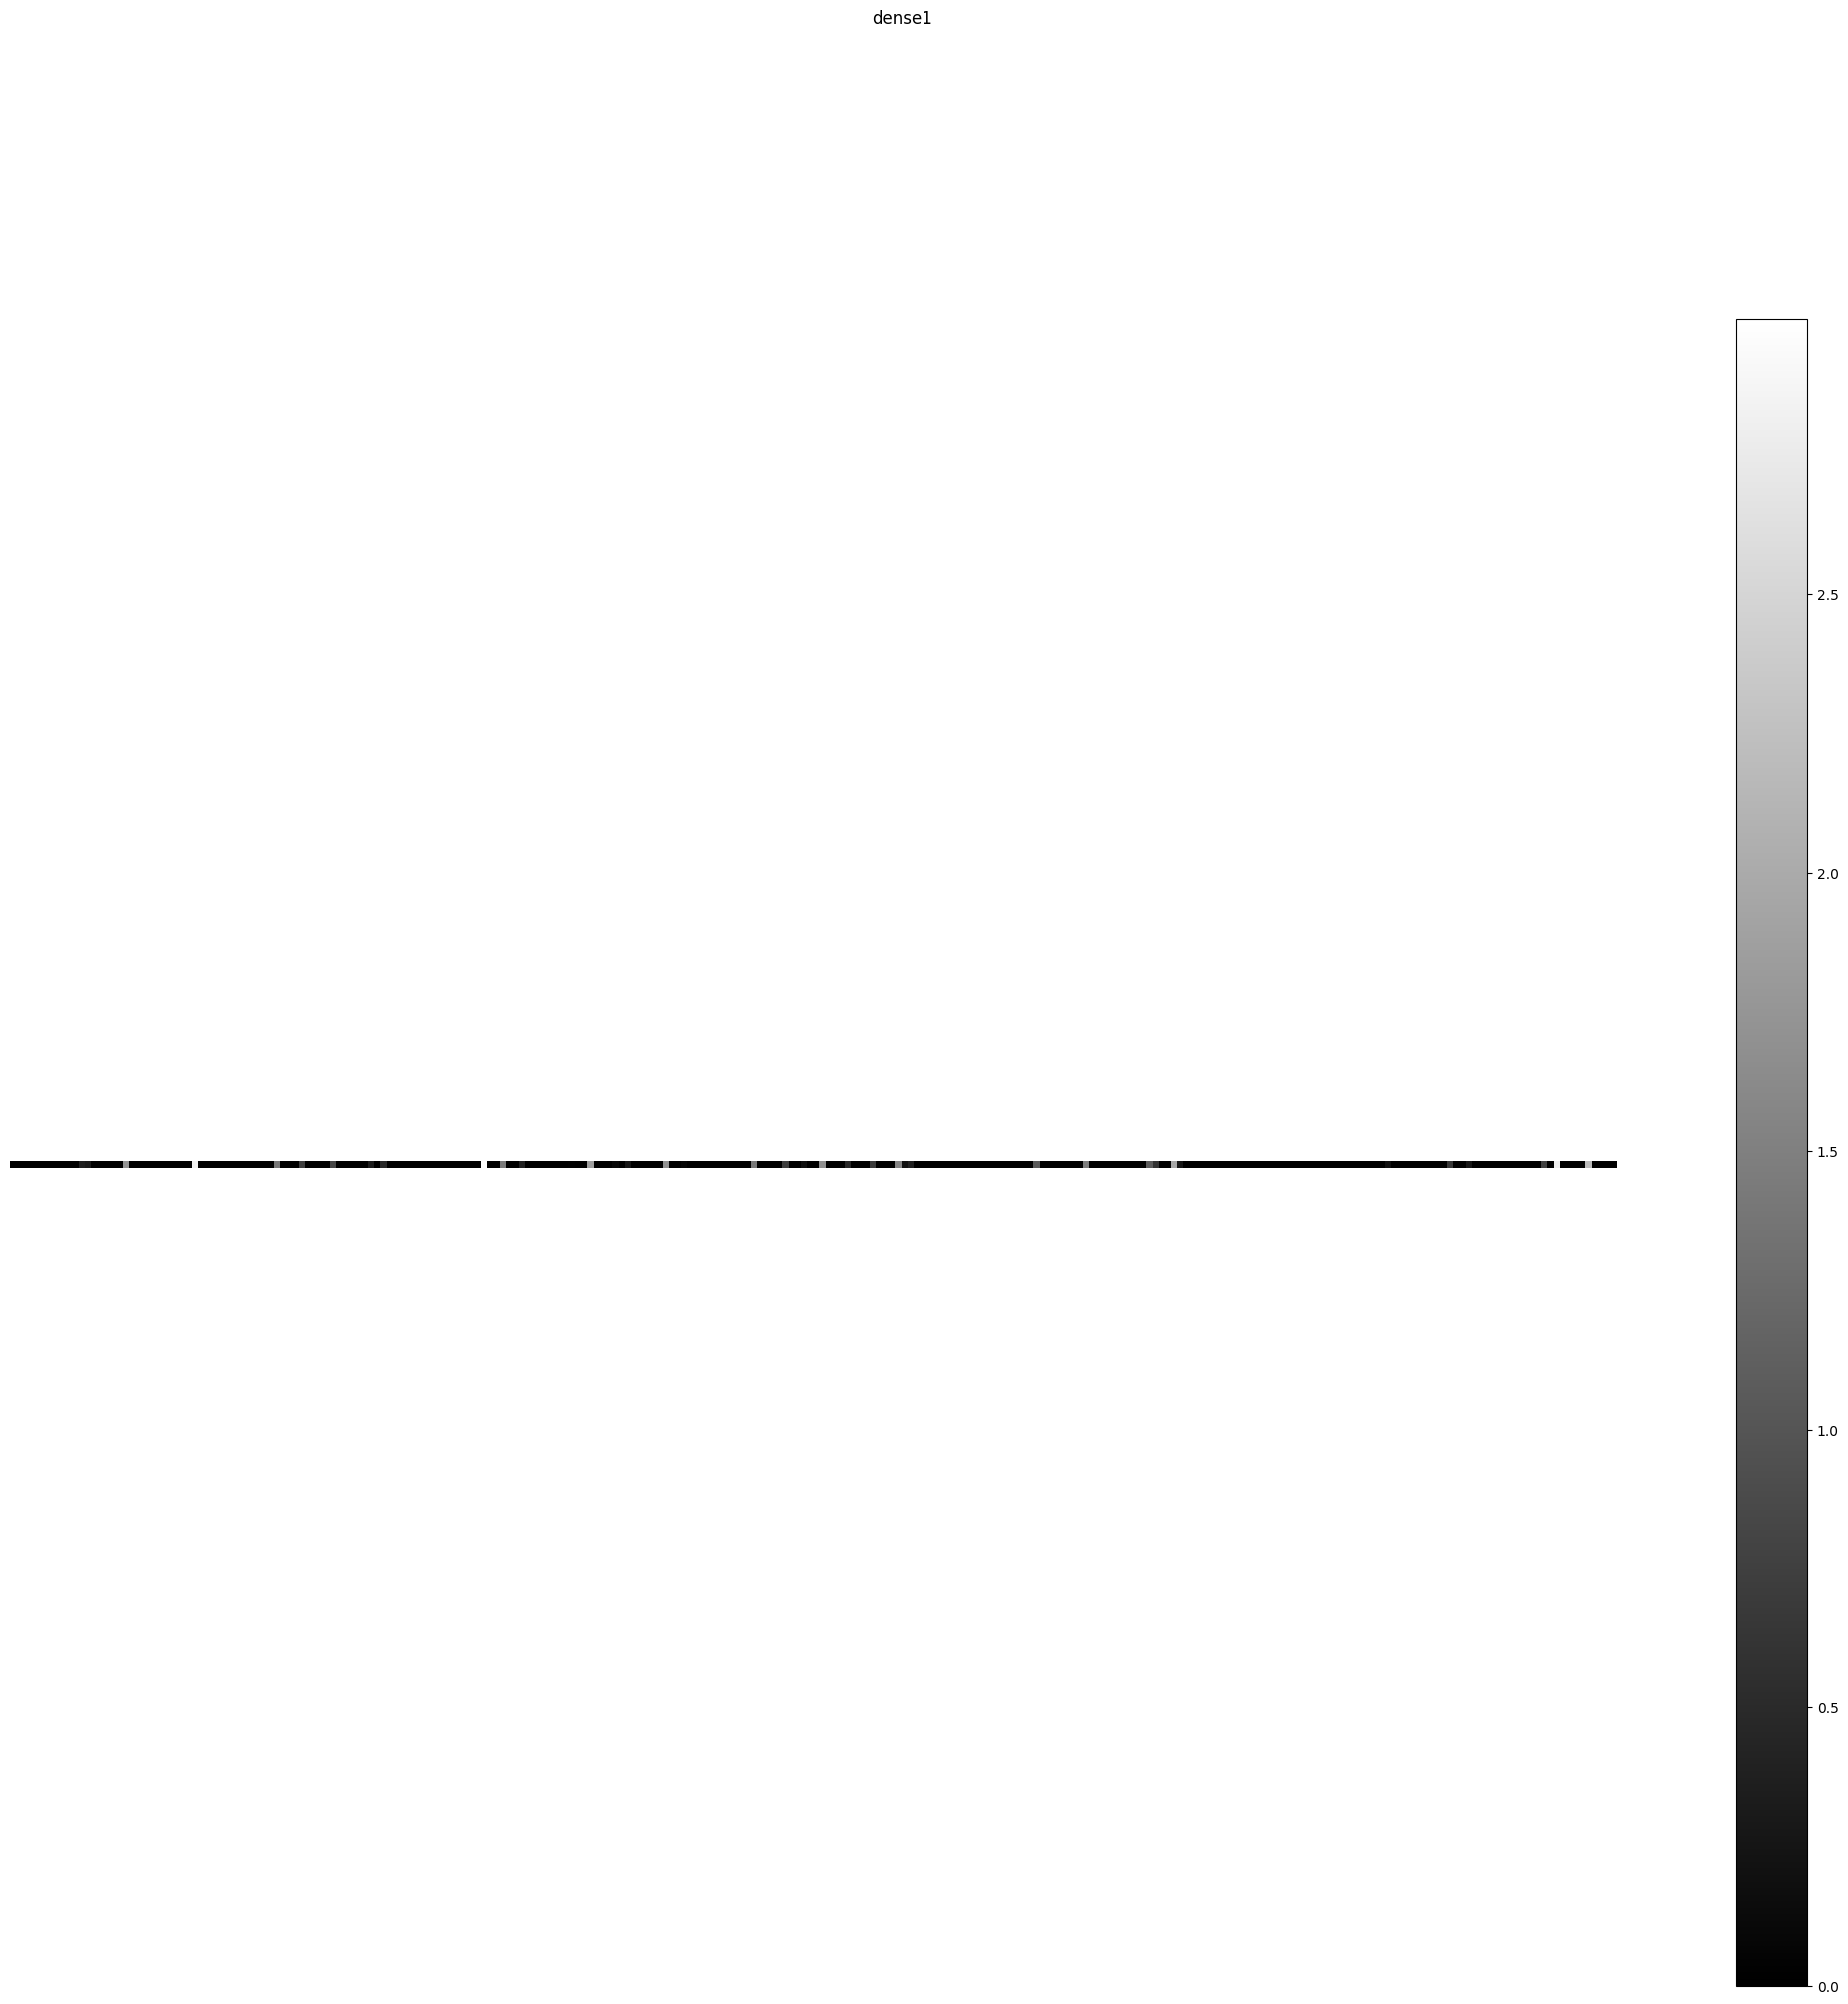

dense2 (1, 10) 


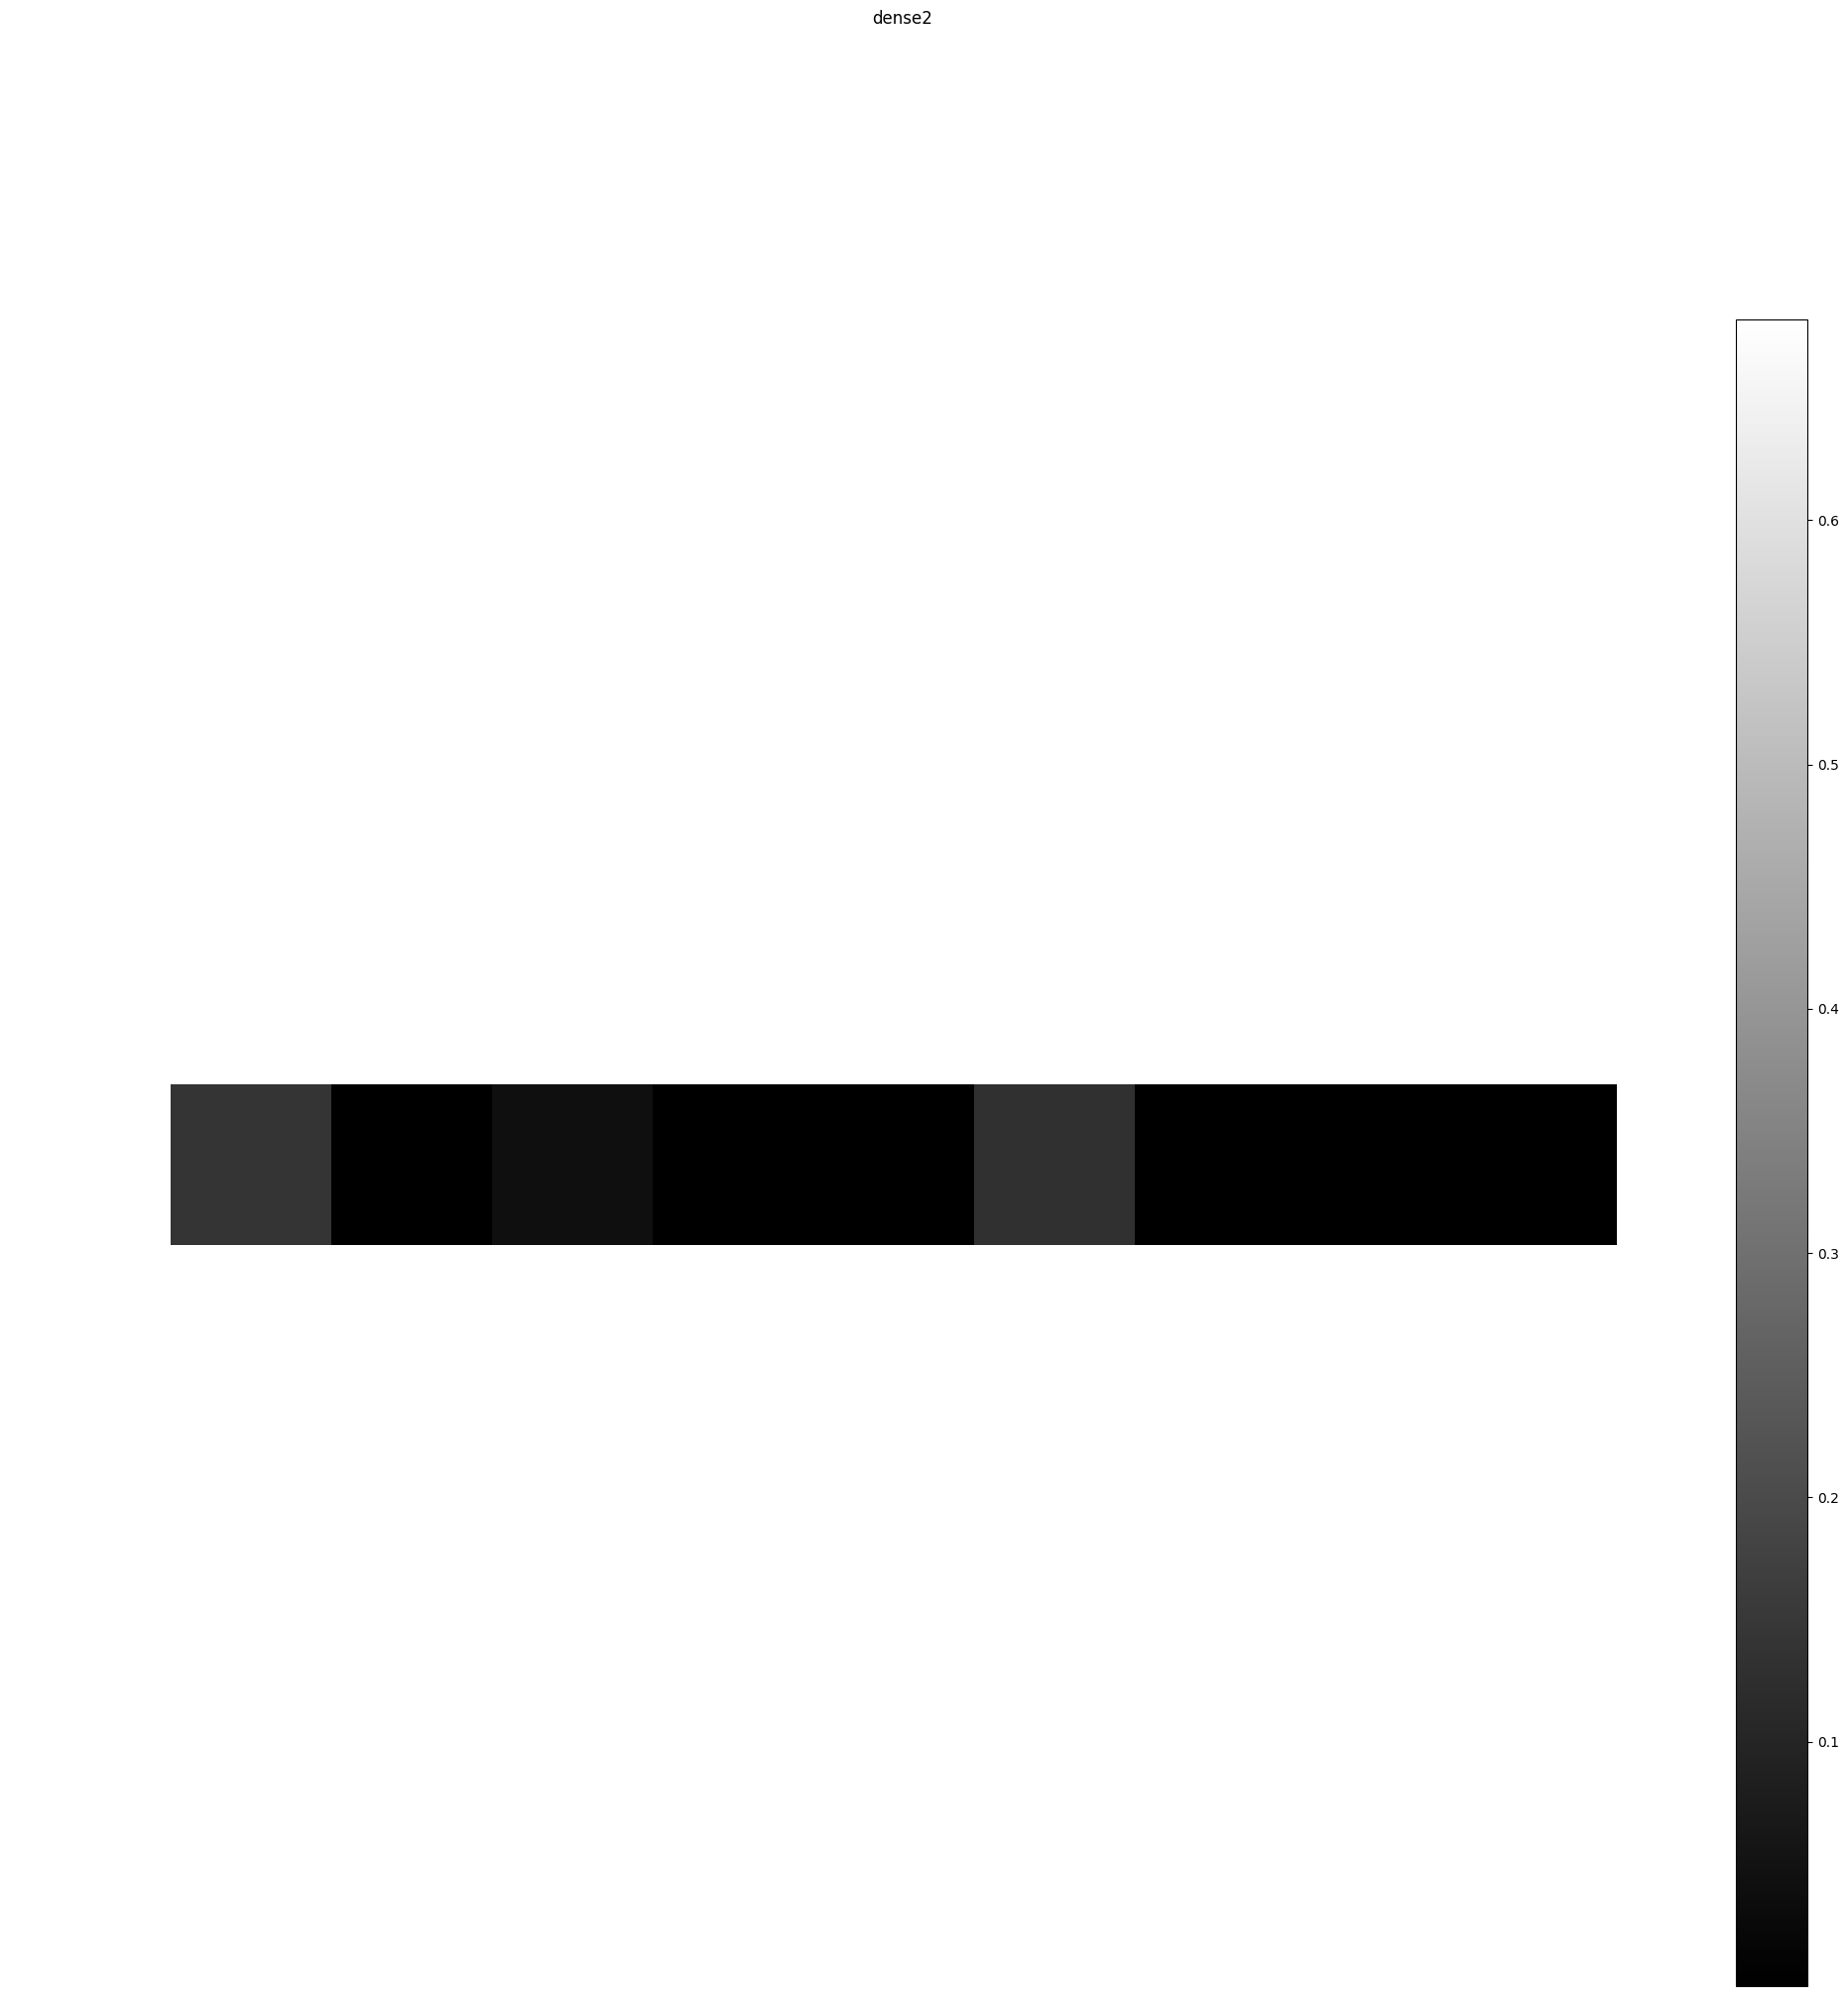

In [24]:
!pip install keract
from keract import get_activations, display_activations
layer_names=['conv1', 'conv2','dense1', 'dense2']
activations_cnn = get_activations(model, x_train[4:5], layer_names=layer_names)
#Plot the image and it's label
plt.imshow(x_train[4],cmap = plt.cm.gray_r,interpolation = "nearest")
plt.show()
print("LABEL: %s"%labels[np.argmax(y_train[4])])

#Plot the feature maps for each layer of the CNN
display_activations(activations_cnn, cmap='gray', save=False)

## Robustness to Gaussian noise


In [25]:
CNN_loss, CNN_acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy prima dell\'aggiunta di rumore: {:.2f}%'.format(CNN_acc * 100))

noise_factor = 0.2
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)


CNN_noise_loss, CNN_noise_acc = model.evaluate(x_test_noisy, y_test, verbose=0)
print('Accuracy dopo l\'aggiunta di rumore: {:.2f}%'.format(CNN_noise_acc * 100))

Accuracy prima dell'aggiunta di rumore: 89.67%
Accuracy dopo l'aggiunta di rumore: 59.00%


In [26]:
y_pred_noisy = model.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


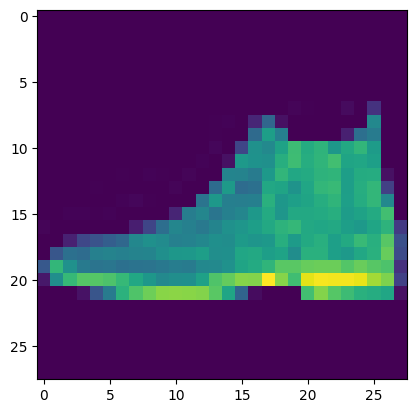

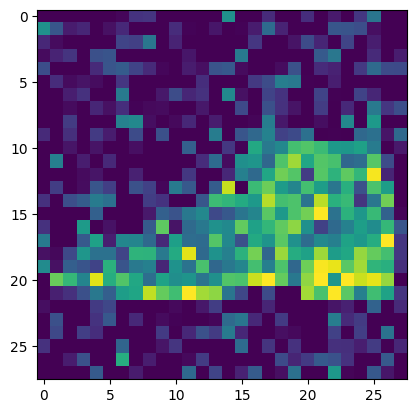

label originale Ankle Boot
label dopo noise Ankle Boot
label predetta dal modello originale Ankle Boot


In [27]:
plt.imshow(x_test[0],cmap = 'viridis',interpolation = "nearest")
plt.show()
plt.imshow(x_test_noisy[0],cmap = 'viridis',interpolation = "nearest")
plt.show()
print("label originale", labels[np.argmax(y_test[0])])
print("label dopo noise", labels[np.argmax(y_pred_noisy[0])])
print("label predetta dal modello originale", labels[np.argmax(y_pred[0])])

## Adversarial Attack

In [28]:
# Definisci la funzione per generare gli attacchi adversariali con il Fast Gradient Sign Method
def generate_adversarial_example(model, input_image, input_label, epsilon):
    # Imposta i gradienti calcolati sulla variabile di input
    input_image = tf.cast(input_image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(input_label, prediction)

    # Calcola i gradienti rispetto all'input
    gradient = tape.gradient(loss, input_image)

    # Applica il segno al gradiente e normalizzalo
    signed_grad = tf.sign(gradient)
    perturbation = epsilon * signed_grad

    # Applica la perturbazione all'immagine originale
    perturbed_image = input_image + perturbation
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)

    return perturbed_image

In [29]:
def plot_adversarial_image(x_adv):
  plt.imshow(x_adv.numpy().squeeze(), cmap='viridis')
  print('Adversarial Example')
  plt.show()
  y_pred = model.predict(x)
  y_pred_adv = model.predict(x_adv)
  print('True Label:', labels[y_true])
  print('Predicted label:', labels[np.argmax(y_pred)])
  print('Predicted label after adversarial attack:', labels[np.argmax(y_pred_adv)])

Original Example


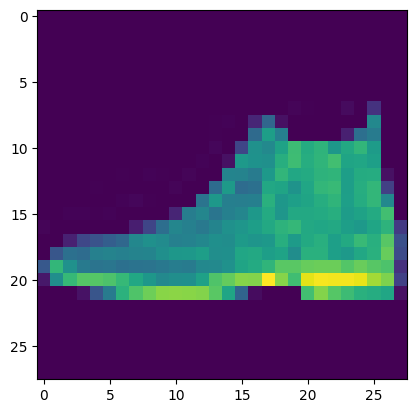

Adversarial Example


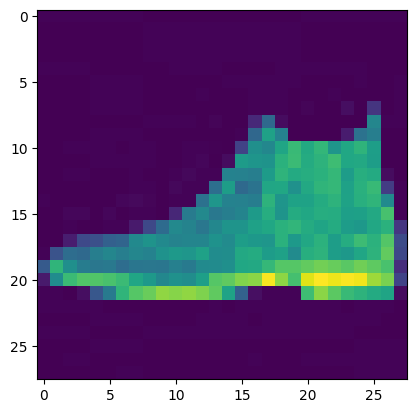

1/1 [==============================] - 0s 26ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot


In [30]:
x = x_test[0]
x = x.reshape(1, 28, 28, 1)
y_true = np.argmax(y_test[0])

# Genera un attacco adversariale con il Fast Gradient Sign Method
epsilon = 0.01
x_adv = generate_adversarial_example(model, x, y_true, epsilon)

# Mostra l'immagine originale e quella perturbata

plt.imshow(x.squeeze(), cmap='viridis')
print("Original Example")
plt.show()

plot_adversarial_image(x_adv)

0.02
Adversarial Example


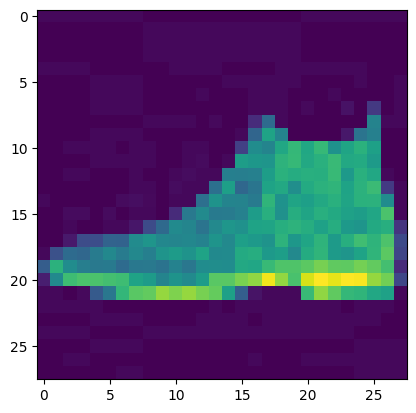

1/1 [==============================] - 0s 21ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.03
Adversarial Example


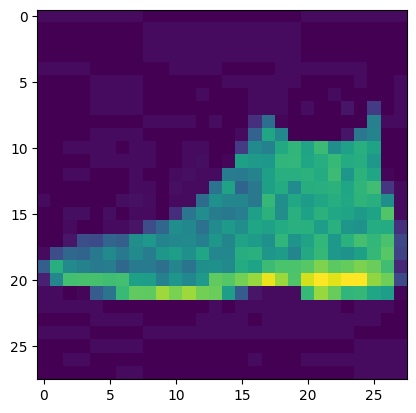

1/1 [==============================] - 0s 23ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.04
Adversarial Example


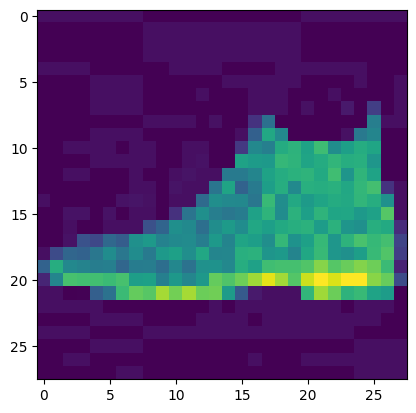

1/1 [==============================] - 0s 18ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.05
Adversarial Example


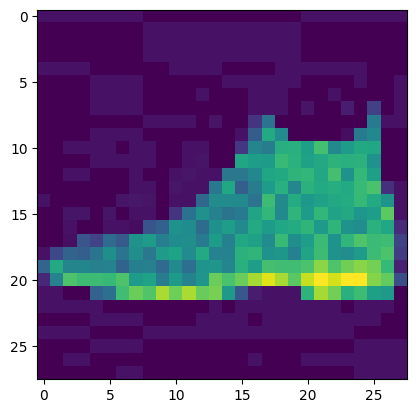

1/1 [==============================] - 0s 22ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.06
Adversarial Example


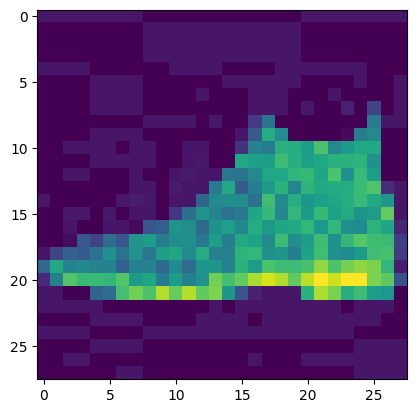

1/1 [==============================] - 0s 27ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.07
Adversarial Example


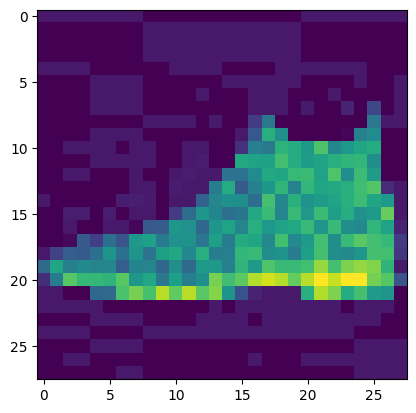

1/1 [==============================] - 0s 23ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.08
Adversarial Example


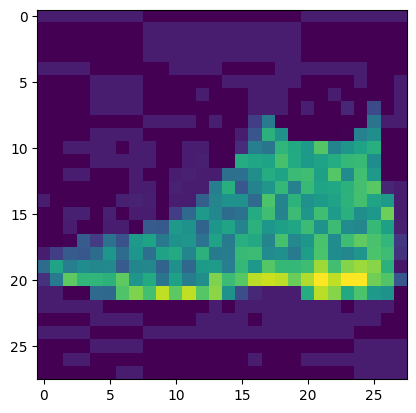

1/1 [==============================] - 0s 25ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.09
Adversarial Example


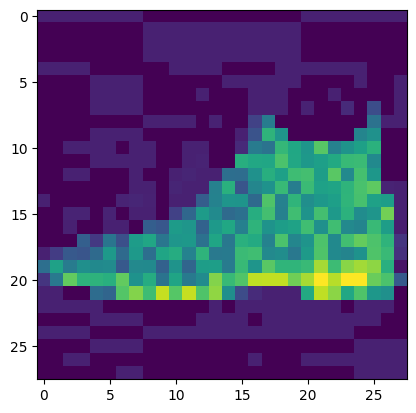

1/1 [==============================] - 0s 18ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.1
Adversarial Example


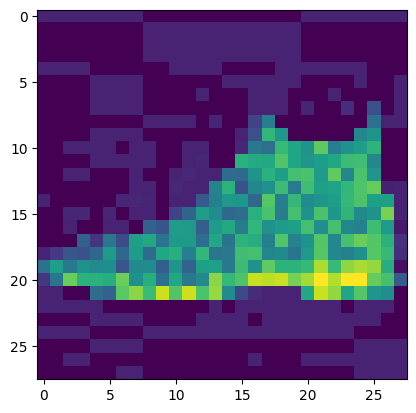

1/1 [==============================] - 0s 18ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker


In [31]:
epsilons = [0.02, 0.03, 0.04, 0.05,0.06,0.07,0.08,0.09,0.1]

for i in epsilons:
  x_adv = generate_adversarial_example(model, x, y_true, i)
  print(i)
  plot_adversarial_image(x_adv)

## CAE—Convolutional Autoencoder

In [32]:
def create_autoencoder():
  # Encoder
  encoder_input = tf.keras.layers.Input(shape=(28,28,1))
  encoder_conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', name='encoder_conv1')(encoder_input)
  encoder_maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=2, name='encoder_maxpool1')(encoder_conv1)
  encoder_dropout1 = tf.keras.layers.Dropout(0.3, name='encoder_dropout1')(encoder_maxpool1)
  encoder_conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='encoder_conv2')(encoder_dropout1)
  encoder_maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=2, name='encoder_maxpool2')(encoder_conv2)
  encoder_dropout2 = tf.keras.layers.Dropout(0.3, name='encoder_dropout2')(encoder_maxpool2)

  # Decoder
  decoder_conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='decoder_conv1')(encoder_dropout2)
  decoder_upsample1 = tf.keras.layers.UpSampling2D(size=(2,2), name='decoder_upsample1')(decoder_conv1)
  decoder_dropout1 = tf.keras.layers.Dropout(0.3, name='decoder_dropout1')(decoder_upsample1)
  decoder_conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', name='decoder_conv2')(decoder_dropout1)
  decoder_upsample2 = tf.keras.layers.UpSampling2D(size=(2,2), name='decoder_upsample2')(decoder_conv2)
  decoder_dropout2 = tf.keras.layers.Dropout(0.3, name='decoder_dropout2')(decoder_upsample2)
  decoder_output = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', activation='sigmoid', name='decoder_output')(decoder_dropout2)

  # Autoencoder
  autoencoder = tf.keras.Model(inputs=encoder_input, outputs=decoder_output, name='autoencoder')
  return autoencoder
autoencoder=create_autoencoder()
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder_conv1 (Conv2D)      (None, 28, 28, 64)        320       
                                                                 
 encoder_maxpool1 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 encoder_dropout1 (Dropout)  (None, 14, 14, 64)        0         
                                                                 
 encoder_conv2 (Conv2D)      (None, 14, 14, 32)        8224      
                                                                 
 encoder_maxpool2 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                  

In [33]:
autoencoder.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
autoencoder_results=autoencoder.fit(x_train_noisy, x_train, batch_size=32, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 18s 12ms/step - loss: 0.0307 - accuracy: 0.5011 - val_loss: 0.0188 - val_accuracy: 0.5057
Epoch 2/30
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0218 - accuracy: 0.5055 - val_loss: 0.0167 - val_accuracy: 0.5065
Epoch 3/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0203 - accuracy: 0.5062 - val_loss: 0.0159 - val_accuracy: 0.5068
Epoch 4/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0196 - accuracy: 0.5065 - val_loss: 0.0151 - val_accuracy: 0.5068
Epoch 5/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0192 - accuracy: 0.5066 - val_loss: 0.0152 - val_accuracy: 0.5070
Epoch 6/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0190 - accuracy: 0.5067 - val_loss: 0.0147 - val_accuracy: 0.5071
Epoch 7/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0188 - accuracy: 0.5068 - val_loss: 0.0149 - val_acc

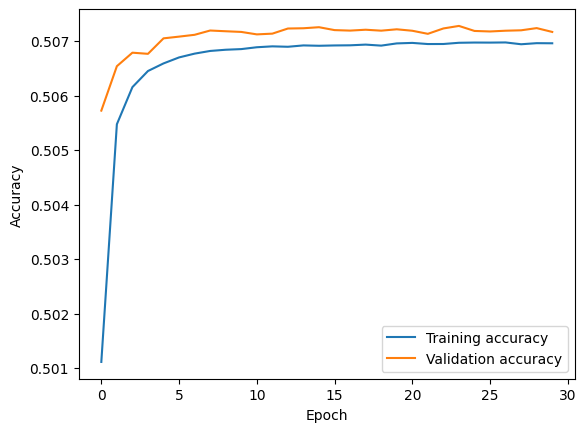

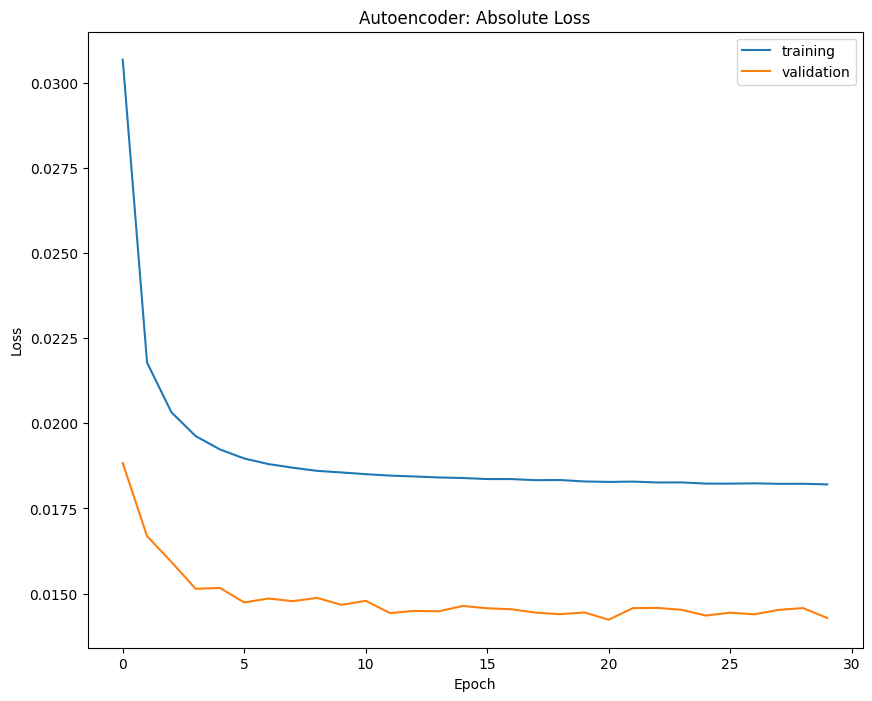

In [34]:
def plot_acc_loss(general_model):
  train_acc2 = general_model.history['accuracy']
  val_acc2 = general_model.history['val_accuracy']

  # Plot accuracy curves
  plt.plot(train_acc2, label='Training accuracy')
  plt.plot(val_acc2, label='Validation accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  #plt.ylim(0.6, 1)  # Set y-axis limits
  plt.show()


  #Store the loss of the training and validation set
  training_loss = general_model.history['loss']
  validation_loss = general_model.history['val_loss']

  #Loss history for training and validation
  plt.figure(figsize=(10, 8))
  plt.plot(training_loss)
  plt.plot(validation_loss)
  plt.title('Autoencoder: Absolute Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['training', 'validation'], loc='upper right')
  plt.show()
plot_acc_loss(autoencoder_results)

313/313 [==============================] - 1s 2ms/step


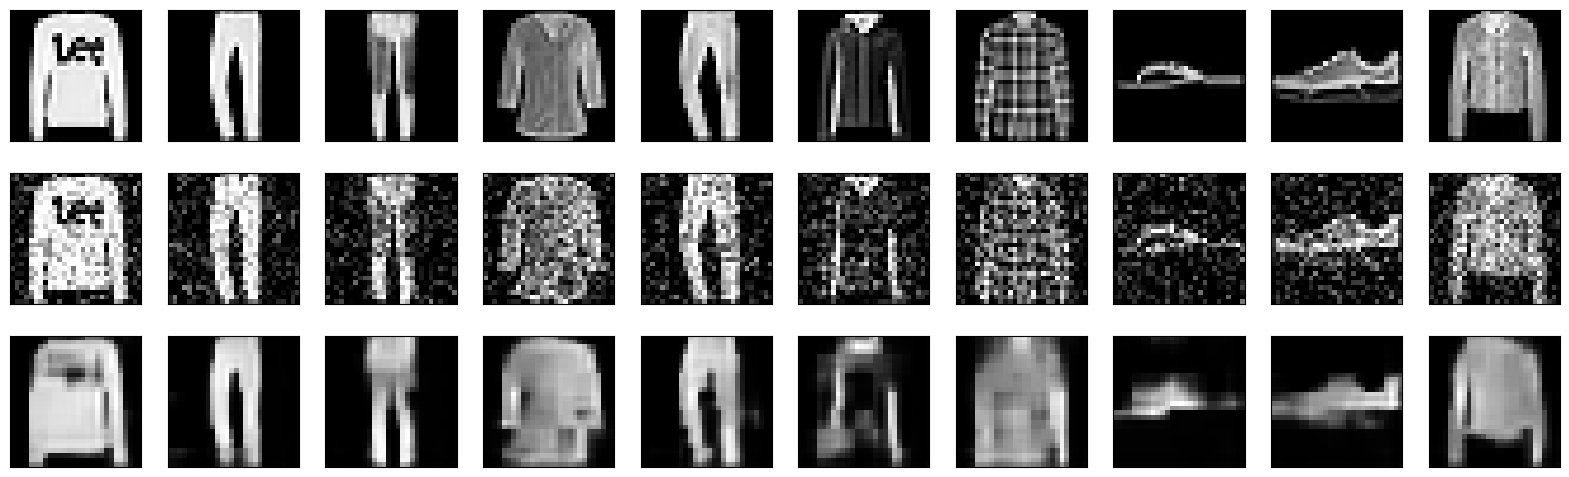

In [35]:
#Perform prediction on the noisy test data 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Display Original images
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display perturbed images
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + (2*n))
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



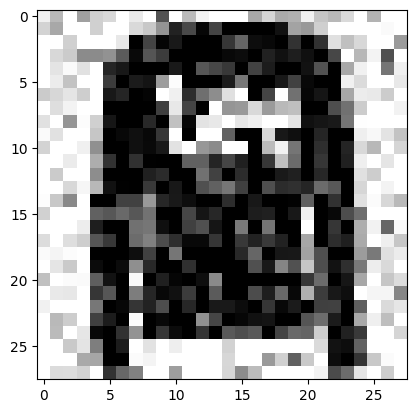

decoder_conv1 (1, 7, 7, 32) 


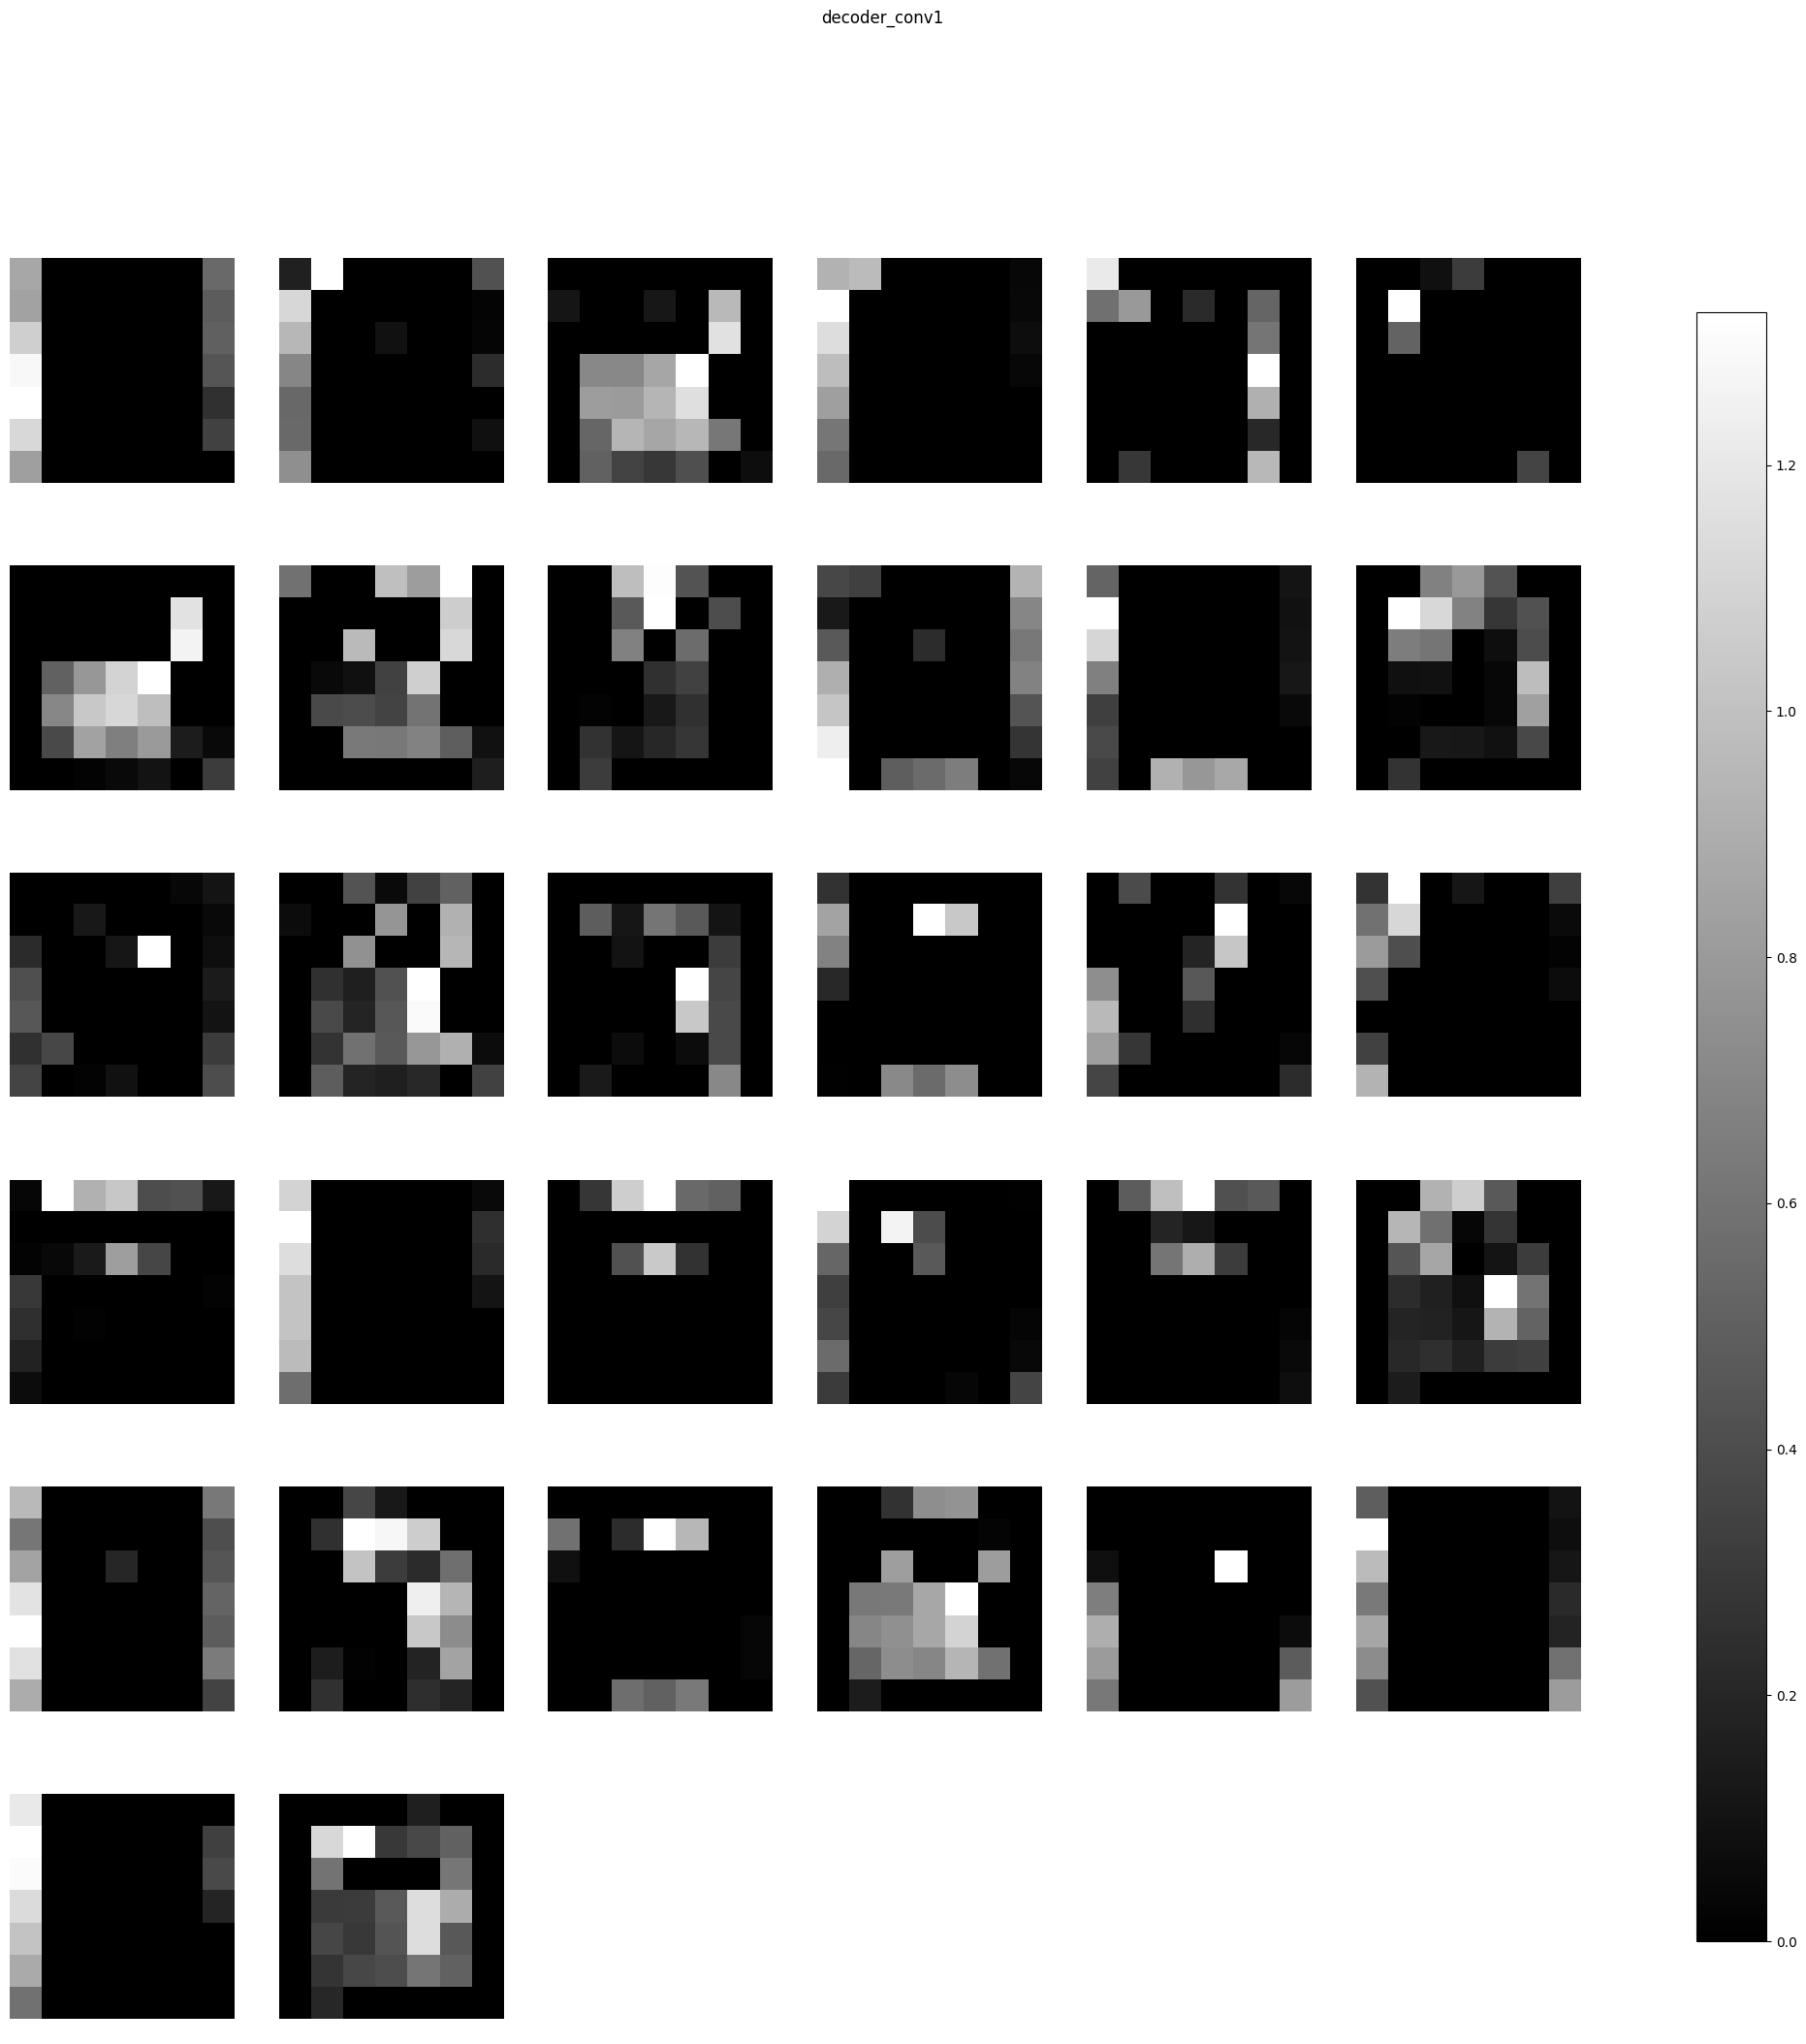

decoder_conv2 (1, 14, 14, 64) 


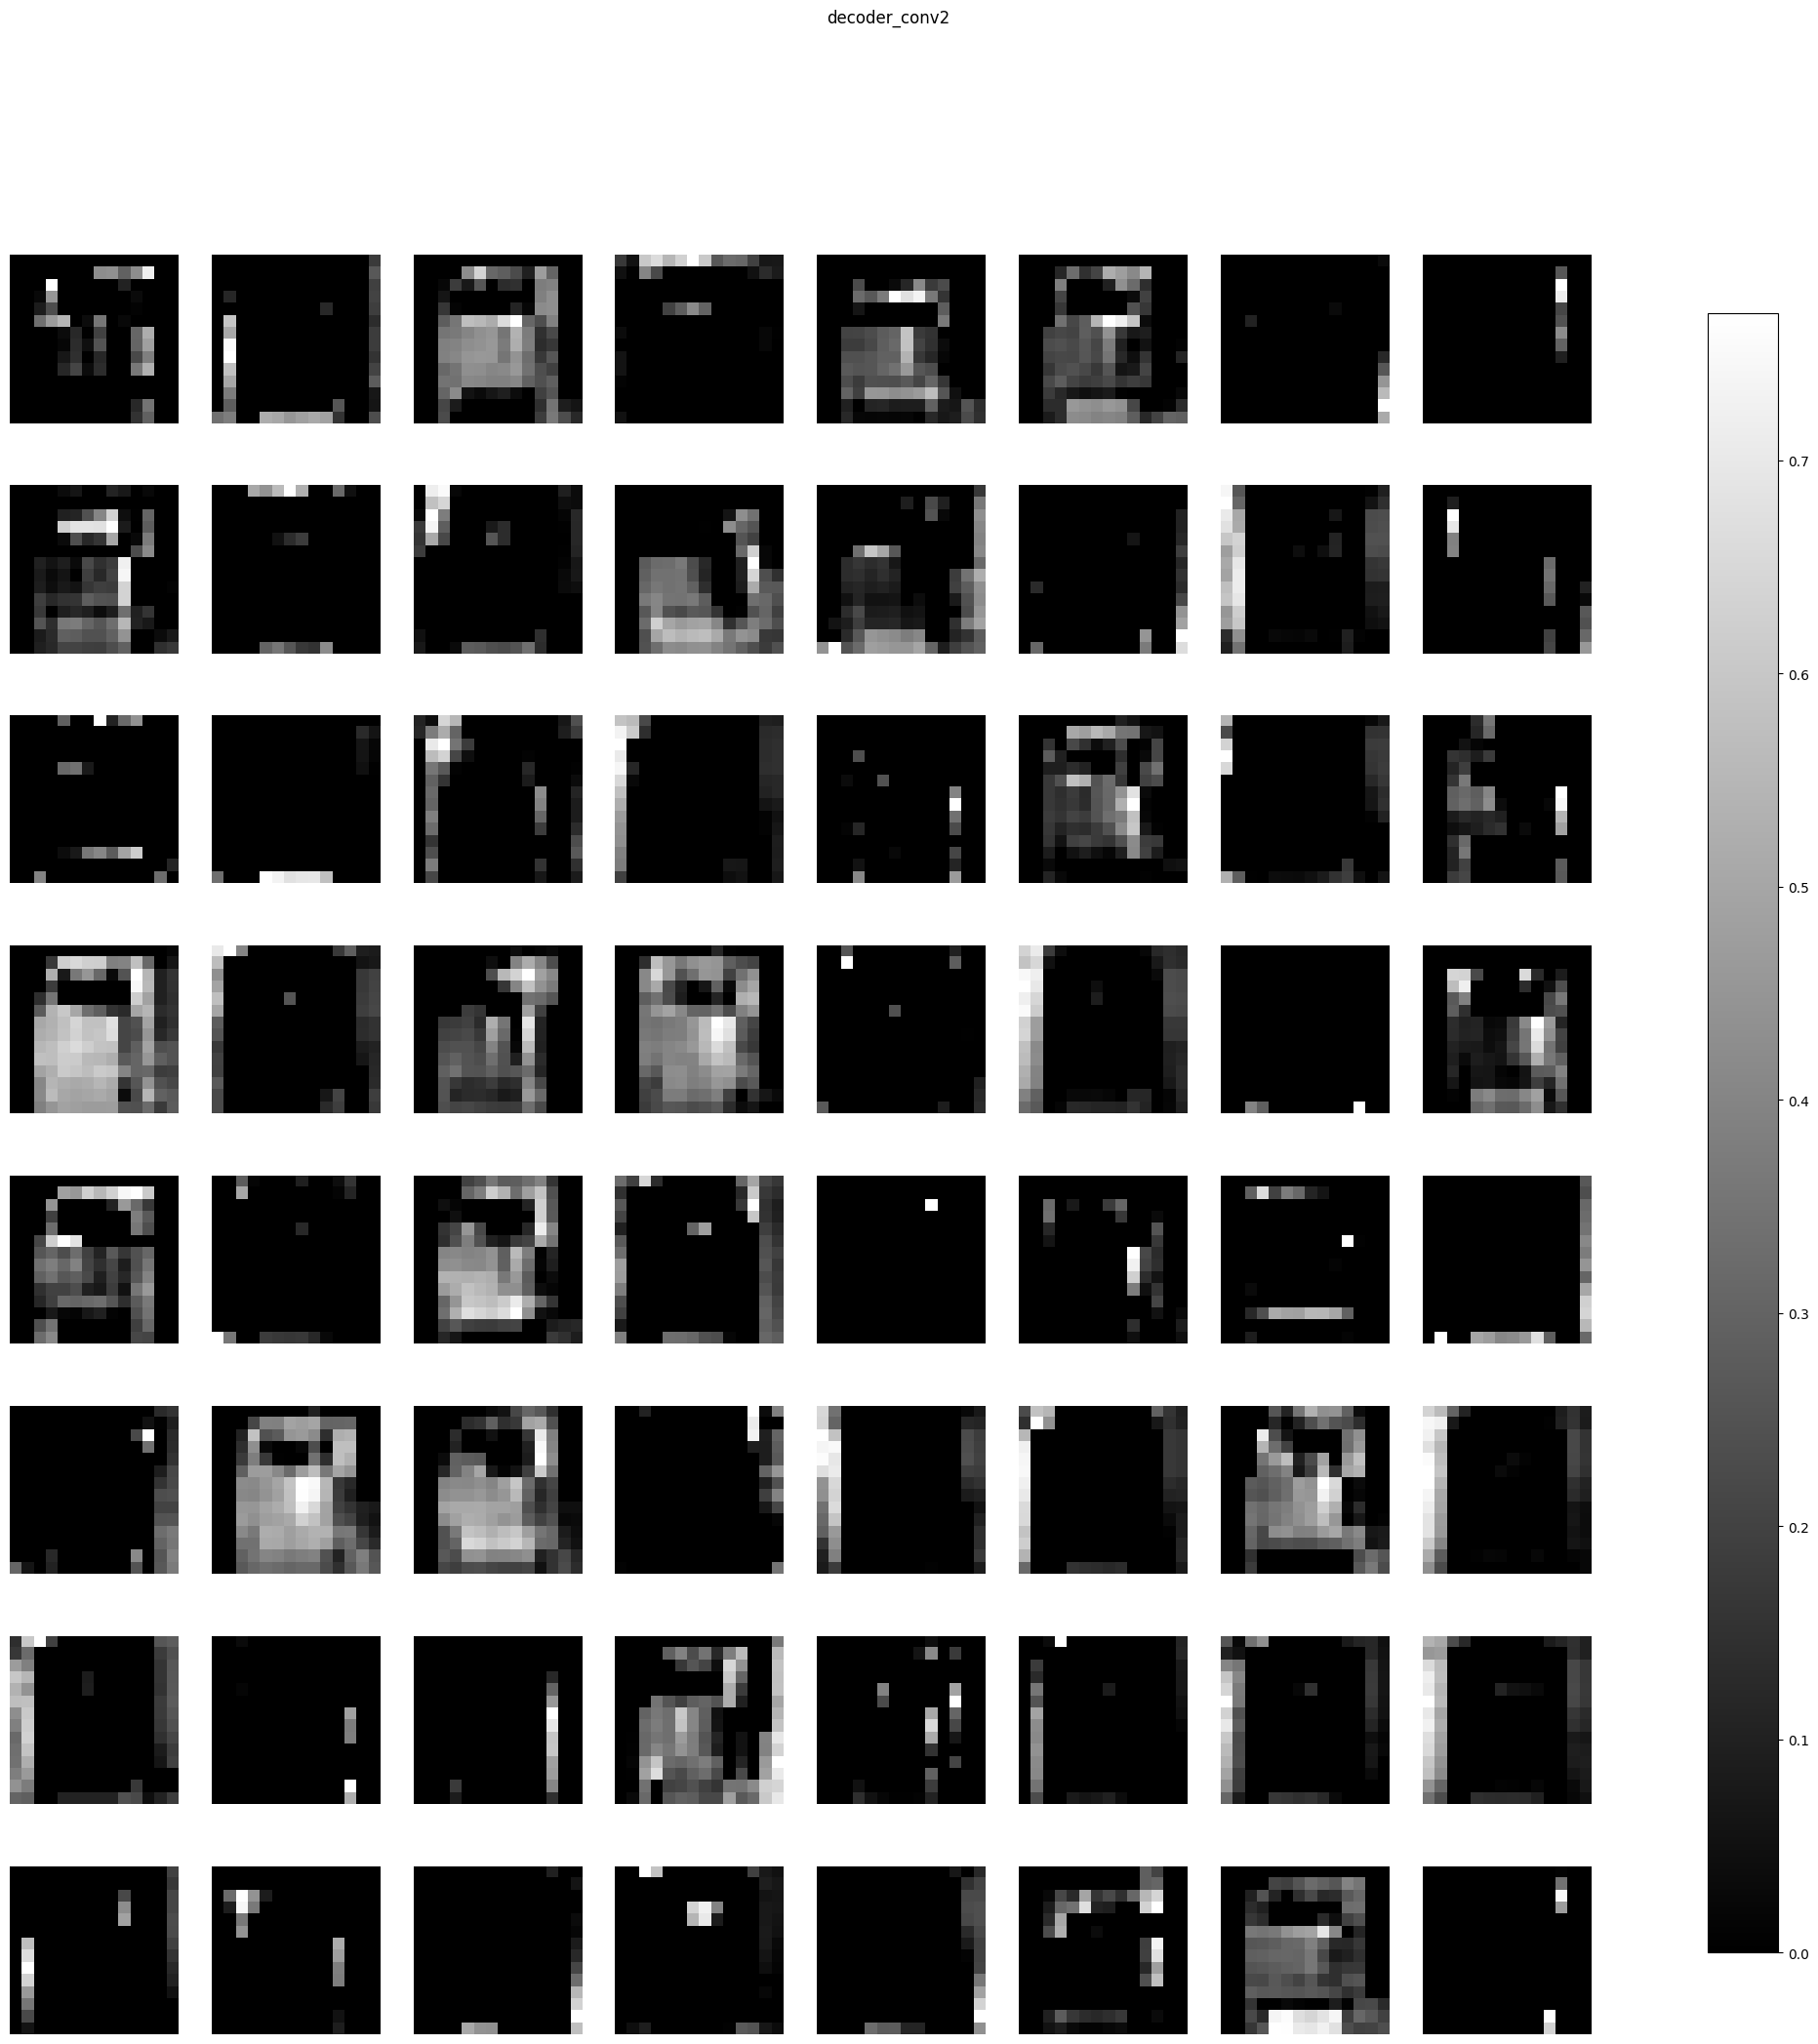

decoder_output (1, 28, 28, 1) 


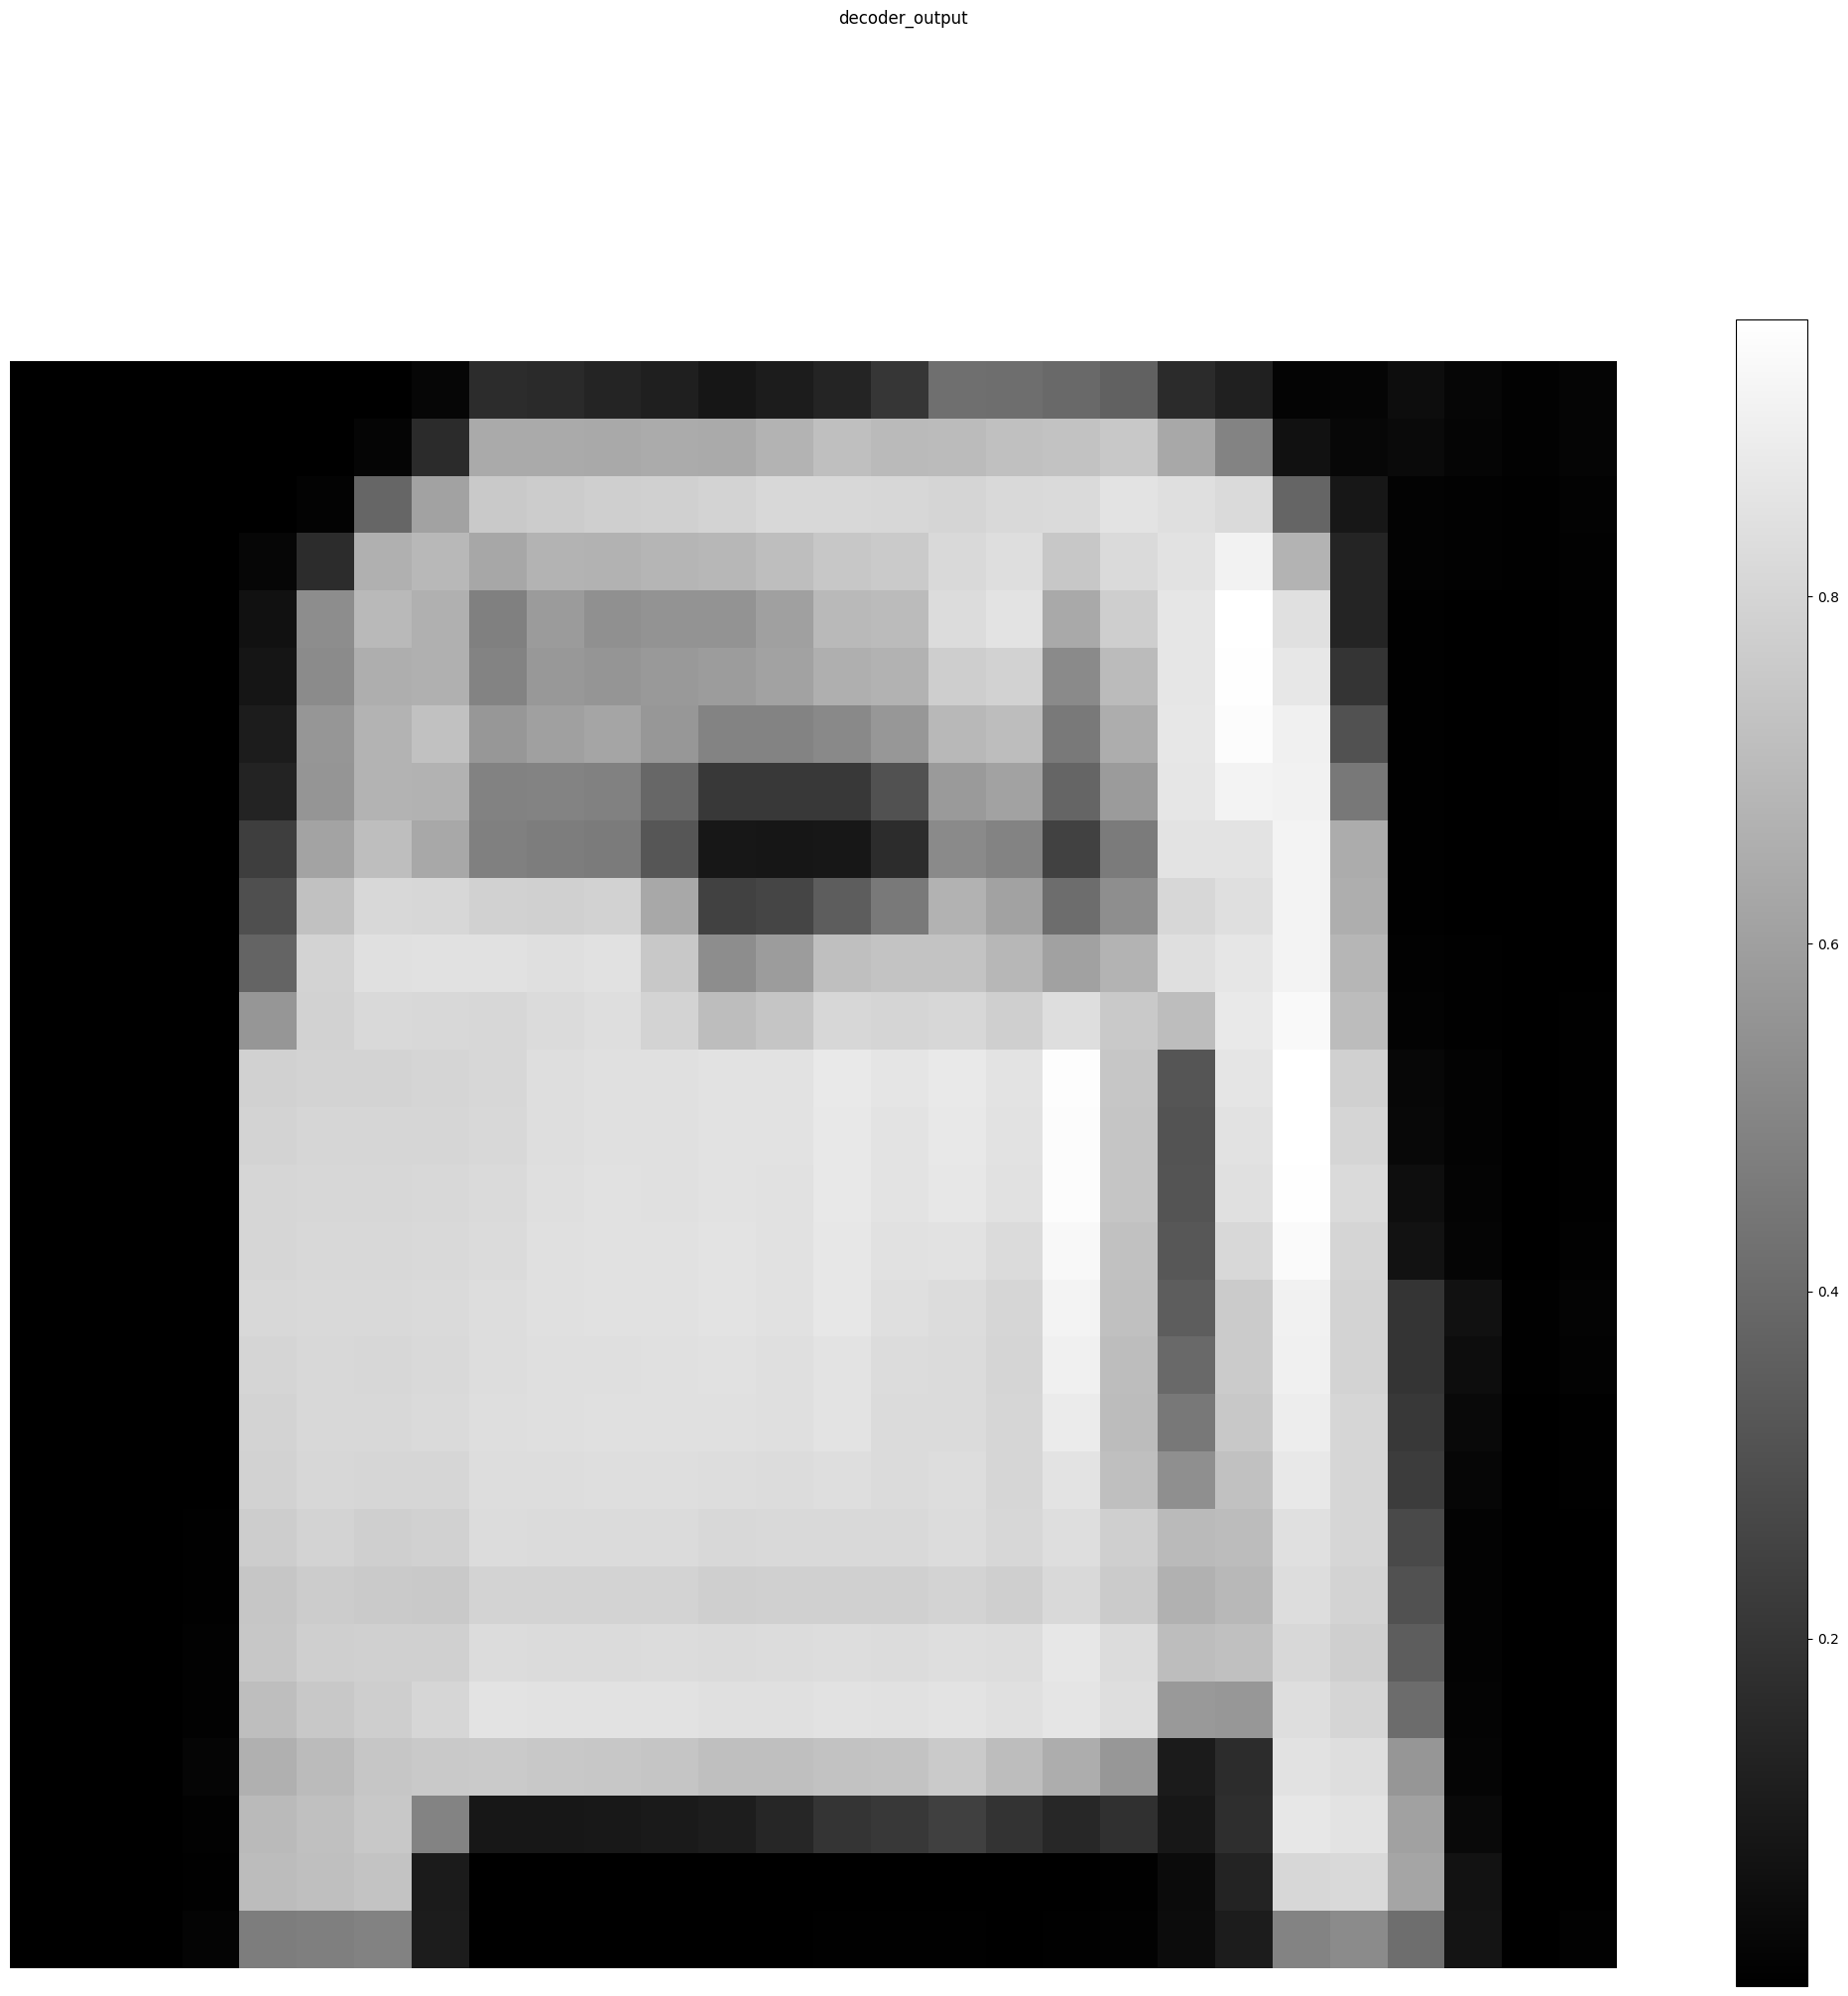

In [43]:
keract_inputs = x_test_noisy[1:2]
autoencoder_layer_names=['decoder_conv1', 'decoder_conv2','decoder_output']

activations_autoenc = get_activations(autoencoder, keract_inputs, layer_names=autoencoder_layer_names)
#Plot the image and it's label
plt.imshow(keract_inputs[0],cmap = plt.cm.gray_r,interpolation = "nearest")
plt.show()

#Plot the feature maps for each layer of the CNN
display_activations(activations_autoenc, save=False)

In [44]:
print('Accuracy prima dell\'aggiunta di rumore: {:.2f}%'.format(CNN_acc * 100))
print('Accuracy dopo l\'aggiunta di rumore: {:.2f}%'.format(CNN_noise_acc * 100))
autoenc_loss, autoenc_acc = model.evaluate(decoded_imgs, y_test, verbose=0)
print('Accuracy dell\'autoencoder: {:.2f}%'.format(autoenc_acc * 100))

Accuracy prima dell'aggiunta di rumore: 89.67%
Accuracy dopo l'aggiunta di rumore: 59.00%
Accuracy dell'autoencoder: 77.52%
